# Introduction

In this workshop, we will estimate the protective efficacy of a new vector control tool, 'ceiling nets,' using data from a hypothetical cluster-randomized controlled trial generated through computer simulation.

About ceiling nets: https://bmjopen.bmj.com/content/15/1/e087832.info

### Importing libraries

In [37]:
# It might take some time, better to run the code in advance of the course.

install.packages("lme4")


The downloaded binary packages are in
	/var/folders/96/48ncxphx0b7grbbpw47748c00000gn/T//RtmpFPV169/downloaded_packages


In [38]:
library(tidyverse)
library(MASS)
library(lme4)

In [39]:
# To make plots
theme <- theme(
            plot.title = element_text(size=20,face="bold"),
            legend.position = "top",
            legend.title = element_blank(),
            legend.text = element_text(size=18,face="bold"),
            axis.text = element_text(size=15),
            axis.title = element_text(size=18,face="bold"),
            axis.line = element_line(colour = "black"),
            plot.margin = unit(c(1, 2, 1, 1), "lines"),
            panel.background = element_blank())

# Participant list


First, you got a cohort participant list from local staff.


*   Cohort children are supposed to be aged 6 month to 14 years old.

*   Variables are the following:

    1.   **cluster_id**: ID for each cluster
    2.   **cohort_id**: Unique identifier for each participant
    3. **name_f**: First name of the participant
    4. **name_l**: Last name of the participant
    5. **birth**: Birthday of the participant
    6. **name_labtec**: Name of lab tech respondible for the cluster



In [40]:
# df_cohort <- read.csv("./list_cohort.csv")
df_cohort <- read.csv("https://raw.githubusercontent.com/KoKYura/KI_PhD_2025/main/data/list_cohort.csv")

In [6]:
df_cohort

cluster_id,cohort_id,name_f,name_l,birth,name_labtec
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
cl01,cl01_01,Sakeena,al-Hoque,2012-03-26,Nicole
cl01,cl01_02,Mitchell,Gonzales,2017-01-02,Nicole
cl01,cl01_03,Anthony,Simmons,2024-08-15,Nicole
cl01,cl01_04,Alyssa,Rivera,2016-10-03,Nicole
cl01,cl01_05,Timothy,Vlajic,2015-09-10,Nicole
cl01,cl01_06,Mana,White,2018-08-09,Nicole
cl01,cl01_07,Chykeiljah,Rea,2022-05-22,Nicole
cl01,cl01_08,Laneesha,Rusk,2011-07-23,Nicole
cl01,cl01_09,Mujaahida,el-Malak,2021-01-02,Nicole


In [7]:
# How many cluster IDs?
unique(df_cohort$cluster_id)

[1] "cl01" "cl02" "cl03" "cl04" "cl05" "cl06" "cl07" "cl08" "cl09" "cl10"
[11] "cl11" "cl12" "cl13" "cl14" "cl15" "cl16" "cl17" "cl18" "cl19" "cl20"

In [8]:
# Number of participants per cluster
df_cohort %>% count(cluster_id)

cluster_id,n
<chr>,<int>
cl01,38
cl02,38
cl03,38
cl04,38
cl05,38
cl06,38
cl07,38
cl08,38
cl09,38


In [9]:
# Lab tech name?
print(unique(df_cohort$name_labtec))

 [1] " Nicole"     " Luis"       " Rustin"     " Phuc Danny" " Kimberly"  
 [6] " Ghaaziya"   " Clifford"   " Antonia"    " Felonice"   " Jordan"    
[11] " Hysoonie"   " Saleet"     " Michael"    " Patrick"    " Darian"    
[16] " Sean"       " Megan"      " Sharaf"     " Rashiah"    " Aaron"     


In [11]:
# Age of participants?
date_survey <- as.Date("2025/04/01")
df_cohort$age <- floor(interval(df_cohort$birth, date_survey) / years(1))

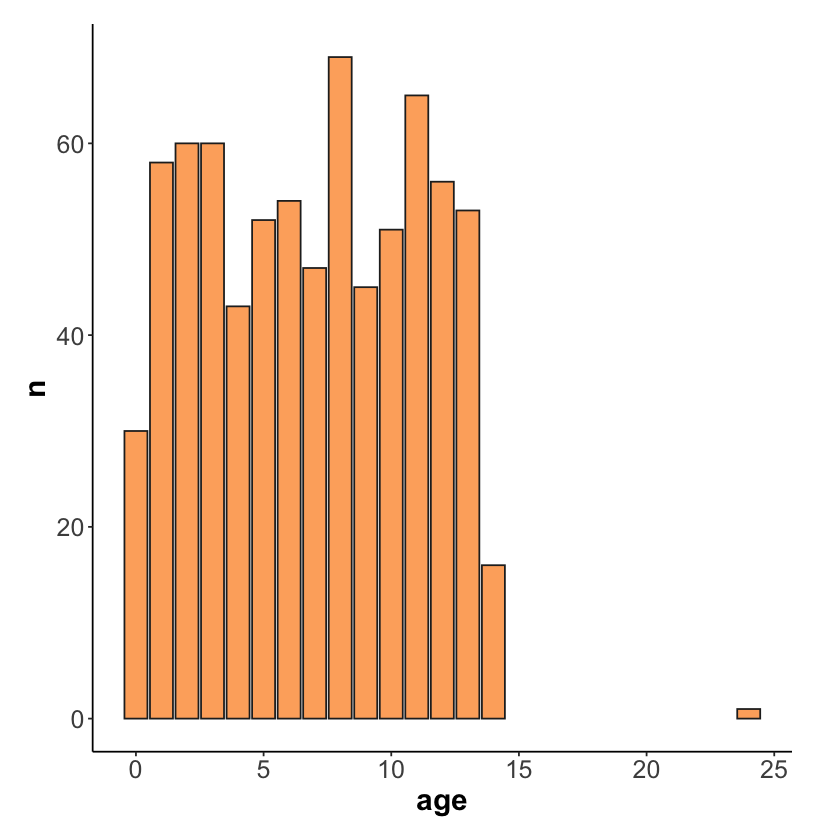

In [12]:
df_cohort_age <- df_cohort %>% count(age)

ggplot(data = df_cohort_age, aes(x = age, y = n))+
  geom_bar(stat = "identity", fill = "#fdae6b", color = "#252525")+
  theme

In [13]:
df_cohort %>% filter(age > 14)

cluster_id,cohort_id,name_f,name_l,birth,name_labtec,age
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
cl01,cl01_11,Austin,Smith,2000/11/30,Nicole,24


There is the 24 y.o adult, Austin in the cohort.

Let's ask Nicole, the lab tech for cluster 'cl01'. Then, you may find that the incorrect birthday was recorded.

Her true birthday is November 30, 2020!

We need to fix the data set.

In [16]:
df_cohort <- df_cohort %>%
  mutate(birth = ifelse(cohort_id == "cl01_11", "2020/11/30", birth)) %>%
  mutate(age = ifelse(cohort_id == "cl01_11", 3, age))

In [17]:
df_cohort %>% filter(cohort_id == "cl01_11")

cluster_id,cohort_id,name_f,name_l,birth,name_labtec,age
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
cl01,cl01_11,Austin,Smith,2020/11/30,Nicole,3


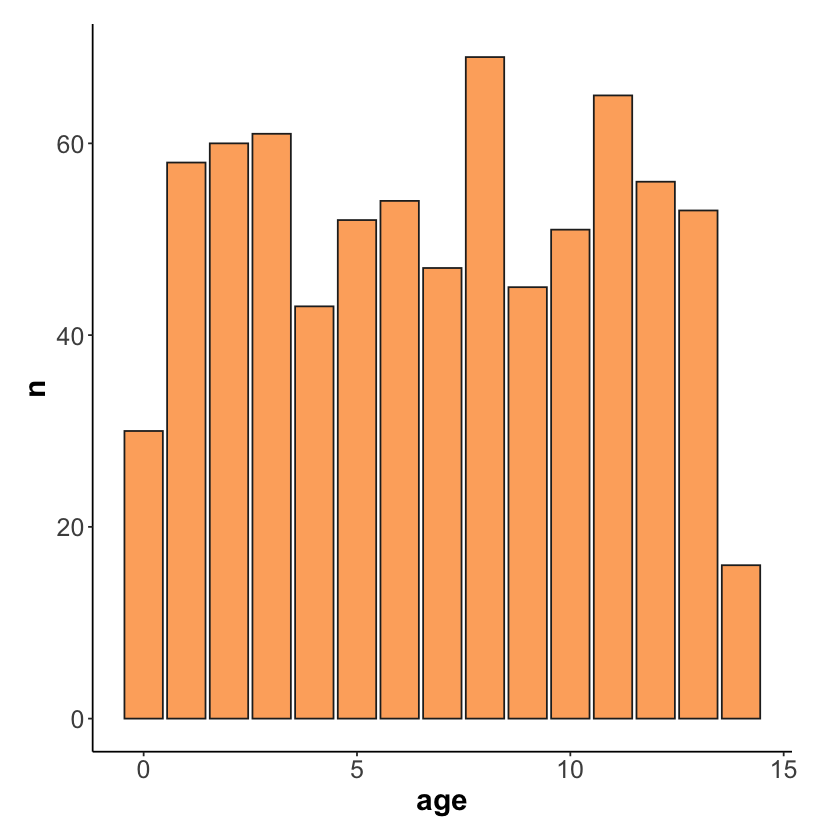

In [18]:
df_cohort_age <- df_cohort %>% count(age)

ggplot(data = df_cohort_age, aes(x = age, y = n))+
   geom_bar(stat = "identity", fill = "#fdae6b", color = "#252525")+
   theme

# Baseline data

We have the following baseline information associated with malaria outcomes.



1.   **intervention**: Intervention or Control assignment (1: intervention, 0: control)
2.   **cn**: Living in the household with ceiling net or not (1: with cn, 0: without cn)
3. **non_bn**: Not using bed net (1: non-user, 0: user)
4. **vac**: With malaria vaccination for those aged 2–6 years old (1: vaccinated)
5. **age_c**: Age category (1: age <= 2 yo, 0: age > 2 yo)
6. **rdt**: RDT results


In [19]:
# df_baseline <- read.csv("./data_baseline.csv")
df_baseline <- read.csv("https://raw.githubusercontent.com/KoKYura/KI_PhD_2025/main/data/data_baseline.csv")

head(df_baseline)

,cluster_id,cohort_id,birth,age,intervention,cn,non_bn,vac,age_c,rdt
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,cl01,cl01_01,2012-03-26,13,1,1,0,0,0,0
2,cl01,cl01_02,2017-01-02,8,1,1,0,0,0,1
3,cl01,cl01_03,2024-08-15,0,1,1,0,0,1,0
4,cl01,cl01_04,2016-10-03,8,1,1,0,0,0,0
5,cl01,cl01_05,2015-09-10,9,1,1,0,0,0,0
6,cl01,cl01_06,2018-08-09,6,1,1,0,1,0,0


Transmission heterogeneity

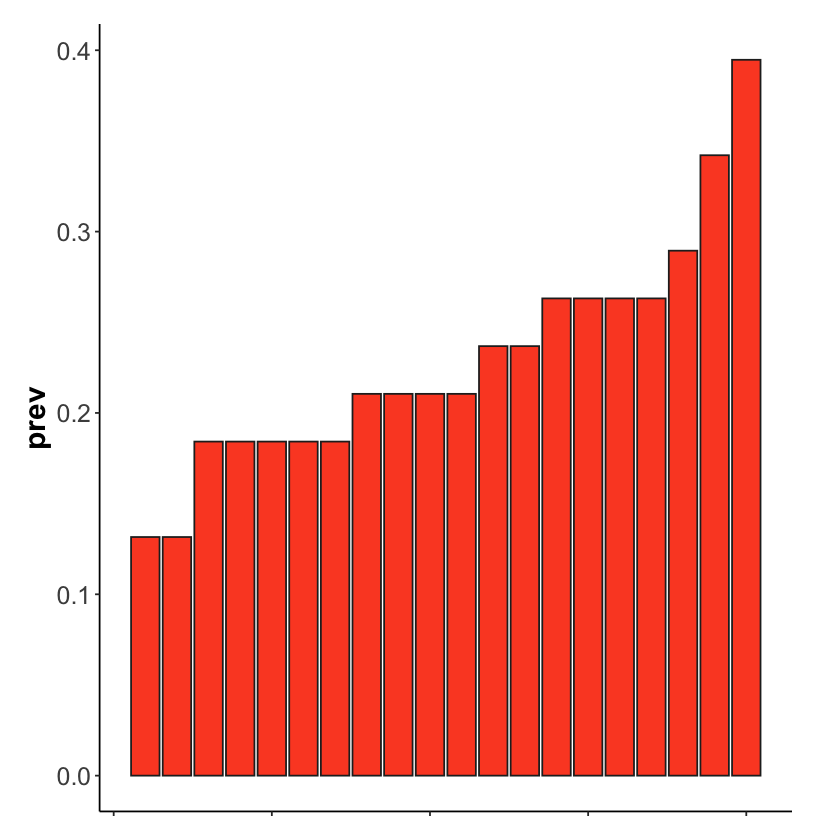

In [20]:
df_prev <- df_baseline %>%
  group_by(cluster_id) %>%
  count(rdt) %>%
  mutate(prev = n/sum(n)) %>%
  filter(rdt == 1) %>%
  arrange(prev) %>%
  ungroup() %>%
  mutate(order = row_number())

ggplot(data = df_prev, aes(x = order, y = prev))+
   geom_bar(stat = "identity", fill = "#fc4e2a", color = "#252525")+
   theme+
   theme(
          axis.title.x = element_blank(),
          axis.text.x = element_blank()
   )

# Analysis of perfect data

Suppose that we know the potential non-compliers, even those in the control arm.

**non_comp**: 1: non complier, 0: complier

In [22]:
# df_full <- read.csv("./data_cohort_full.csv")
df_full <- read.csv("https://raw.githubusercontent.com/KoKYura/KI_PhD_2025/main/data/data_cohort_full.csv")

head(df_full,20)

,cohort_id,visit,outcome,cluster_id,name_f,name_l,birth,name_labtec,age,intervention,cn,non_comp,non_bn,vac,age_c
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,cl01_01,1,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
2,cl01_01,2,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
3,cl01_01,3,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
4,cl01_01,4,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
5,cl01_01,5,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
6,cl01_01,6,1,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
7,cl01_01,7,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
8,cl01_01,8,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0
9,cl01_01,9,0,cl01,Sakeena,al-Hoque,2012/03/26,Nicole,13,1,1,0,0,0,0


In [23]:
head(df_full %>% filter(intervention == 1 & non_comp == 1))

,cohort_id,visit,outcome,cluster_id,name_f,name_l,birth,name_labtec,age,intervention,cn,non_comp,non_bn,vac,age_c
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,cl01_10,1,0,cl01,Jasmine,Figueroa,2013/02/21,Nicole,12,1,0,1,0,0,0
2,cl01_10,2,0,cl01,Jasmine,Figueroa,2013/02/21,Nicole,12,1,0,1,0,0,0
3,cl01_10,3,0,cl01,Jasmine,Figueroa,2013/02/21,Nicole,12,1,0,1,0,0,0
4,cl01_10,4,0,cl01,Jasmine,Figueroa,2013/02/21,Nicole,12,1,0,1,0,0,0
5,cl01_10,5,0,cl01,Jasmine,Figueroa,2013/02/21,Nicole,12,1,0,1,0,0,0
6,cl01_10,6,0,cl01,Jasmine,Figueroa,2013/02/21,Nicole,12,1,0,1,0,0,0


In [27]:
df_full_count <- df_full %>%
    group_by(cohort_id) %>%
    summarise(
    num_pos = sum(outcome),
    total_visit = n()
  )

In [28]:
df_full2 <- df_full %>%
    dplyr::select(cluster_id, cohort_id, intervention, cn, non_comp, non_bn, vac, age_c) %>%
    left_join(df_full_count, by = "cohort_id") %>%
    distinct(cohort_id, .keep_all = T)

In [30]:
df_full2

cluster_id,cohort_id,intervention,cn,non_comp,non_bn,vac,age_c,num_pos,total_visit
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cl01,cl01_01,1,1,0,0,0,0,1,12
cl01,cl01_02,1,1,0,0,0,0,0,12
cl01,cl01_03,1,1,0,0,0,1,1,12
cl01,cl01_04,1,1,0,0,0,0,0,12
cl01,cl01_05,1,1,0,0,0,0,1,12
cl01,cl01_06,1,1,0,0,1,0,2,12
cl01,cl01_07,1,1,0,0,1,1,1,12
cl01,cl01_08,1,1,0,0,0,0,0,12
cl01,cl01_09,1,1,0,0,1,0,0,12


**Analysis**

**Mixed-effects negative binomial regression**


\begin{align*}
y_{ij} &\sim NegBin(\lambda_{ij}, \theta) \\
{\lambda_{ij}} &= exp(\alpha + x_{ij}^T\beta + u_j + log{A_{ij}})  \\
\ u_j &\sim N(0, \sigma_{u}^2) \\
\end{align*}

where $y_{ij}$ denotes the total number of clinical malaria diagnosis for individual $i$ in a cluster $j$, $x_{i,j}$ is the covariate vector, $u_{j}$ is the Gaussian-type randome effect at the cluster level, $A_{ij}$ is the total number of visits.

The protective efficacy will be estimated by $(1 − exp(𝛽_{1}))$ × 100%, where $𝛽_{1}$ is the estimated regression coefficient of
the treatment.

In [31]:
model <- glmer.nb(num_pos ~
                       cn +
                       non_comp +
                       non_bn +
                       vac +
                       age_c +
                       offset(log(total_visit)) +
                       (1 | cluster_id), data = df_full2)

In [32]:
print(exp(fixef(model)))
exp(confint(model, parm = "beta_", method = "Wald"))

print(paste0("Estimated efficacy of the ceiling net: ", round(1-exp(fixef(model))[[2]],2)))

(Intercept)          cn    non_comp      non_bn         vac       age_c 
  0.1228261   0.5104341   1.4220580   1.2569279   0.7169906   1.3920482 


,2.5 %,97.5 %
(Intercept),0.09708232,0.1553966
cn,0.37308061,0.6983556
non_comp,1.05054378,1.9249545
non_bn,1.00850311,1.5665471
vac,0.57512548,0.8938492
age_c,1.10753455,1.7496504


[1] "Estimated efficacy of the ceiling net: 0.49"


In [23]:
model_itt <- glmer.nb(num_pos ~
                       intervention +
                       non_bn +
                       vac +
                       age_c +
                       offset(log(total_visit)) +
                       (1 | cluster_id), data = df_full2)

In [24]:
print(exp(fixef(model_itt)))
exp(confint(model_itt, parm = "beta_", method = "Wald"))

print(paste0("Estimated efficacy of the ceiling net: ", round(1-exp(fixef(model_itt))[[2]],2)))

 (Intercept) intervention       non_bn          vac        age_c 
   0.1286836    0.5776051    1.2834066    0.7067944    1.3569850 


,2.5 %,97.5 %
(Intercept),0.1018418,0.1625999
intervention,0.4202114,0.7939519
non_bn,1.0251053,1.6067936
vac,0.5651008,0.8840164
age_c,1.0753586,1.7123667


[1] "Estimated efficacy of the ceiling net: 0.42"


In [25]:
model_pp <- glmer.nb(num_pos ~
                       cn +
                       non_bn +
                       vac +
                       age_c +
                       offset(log(total_visit)) +
                       (1 | cluster_id), data = df_full2)

In [26]:
print(exp(fixef(model_pp)))
exp(confint(model_pp, parm = "beta_", method = "Wald"))

print(paste0("Estimated efficacy of the ceiling net: ", round(1-exp(fixef(model_pp))[[2]],2)))

(Intercept)          cn      non_bn         vac       age_c 
  0.1381743   0.4291427   1.2670426   0.7067751   1.4062605 


,2.5 %,97.5 %
(Intercept),0.1110701,0.1718926
cn,0.3202724,0.5750211
non_bn,1.0158320,1.5803764
vac,0.5664744,0.8818245
age_c,1.1178892,1.7690202


[1] "Estimated efficacy of the ceiling net: 0.57"


# Analysis of raw data

If you get to know who is the non complier, then we can estimate the data perfectly, but in reality it is not possible.



*   **symp**: 1: with malaria related symptoms
*   **rdt**: 1: malaria RDT positive



In [41]:
# df_raw <- read.csv("./data_cohort_raw.csv")
df_raw <- read.csv("https://raw.githubusercontent.com/KoKYura/KI_PhD_2025/main/data/data_cohort_raw.csv")

head(df_raw)

,cluster_id,cohort_id,visit,avail,name_f,name_l,symp,rdt
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,cl01,cl01_01,1,1,Sakeena,al-Hoque,0,0
2,cl01,cl01_02,1,1,Mitchell,Gonzales,0,NA
3,cl01,cl01_03,1,1,Anthony,Simmons,0,1
4,cl01,cl01_04,1,1,Alyssa,Rivera,0,1
5,cl01,cl01_05,1,1,Timothy,Vlajic,0,0
6,cl01,cl01_06,1,1,Mana,White,1,0


We need the variable for clinical malaria, defined as having both symptoms and a positive RDT result.


In [42]:
df_raw2 <- df_raw %>%
    mutate(outcome = case_when(rdt == 1 & symp == 1 ~ 1,
                              rdt == 0 | symp == 0 ~ 0))

In [43]:
head(df_raw2)

,cluster_id,cohort_id,visit,avail,name_f,name_l,symp,rdt,outcome
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>
1,cl01,cl01_01,1,1,Sakeena,al-Hoque,0,0,0
2,cl01,cl01_02,1,1,Mitchell,Gonzales,0,NA,0
3,cl01,cl01_03,1,1,Anthony,Simmons,0,1,0
4,cl01,cl01_04,1,1,Alyssa,Rivera,0,1,0
5,cl01,cl01_05,1,1,Timothy,Vlajic,0,0,0
6,cl01,cl01_06,1,1,Mana,White,1,0,0


In [44]:
df_raw_count <- df_raw2 %>%
    group_by(cohort_id) %>%
    summarise(
    num_pos = sum(outcome,na.rm=T),
    total_visit = sum(avail)
  )




*   Combine with the baseline covariates
*   Calcluate incidence rate per person-year



In [45]:
df_raw3 <- left_join(df_raw_count, df_baseline) %>%
    distinct(cohort_id, .keep_all = T) %>%
    mutate(incidence_rate = 12*num_pos/total_visit)
head(df_raw3)

Joining with `by = join_by(cohort_id)`


cohort_id,num_pos,total_visit,cluster_id,birth,age,intervention,cn,non_bn,vac,age_c,rdt,incidence_rate
<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
cl01_01,1,9,cl01,2012-03-26,13,1,1,0,0,0,0,1.333333
cl01_02,0,12,cl01,2017-01-02,8,1,1,0,0,0,1,0.000000
cl01_03,1,11,cl01,2024-08-15,0,1,1,0,0,1,0,1.090909
cl01_04,0,12,cl01,2016-10-03,8,1,1,0,0,0,0,0.000000
cl01_05,1,11,cl01,2015-09-10,9,1,1,0,0,0,0,1.090909
cl01_06,2,11,cl01,2018-08-09,6,1,1,0,1,0,0,2.181818


# Detect errors

## Outcome errors

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


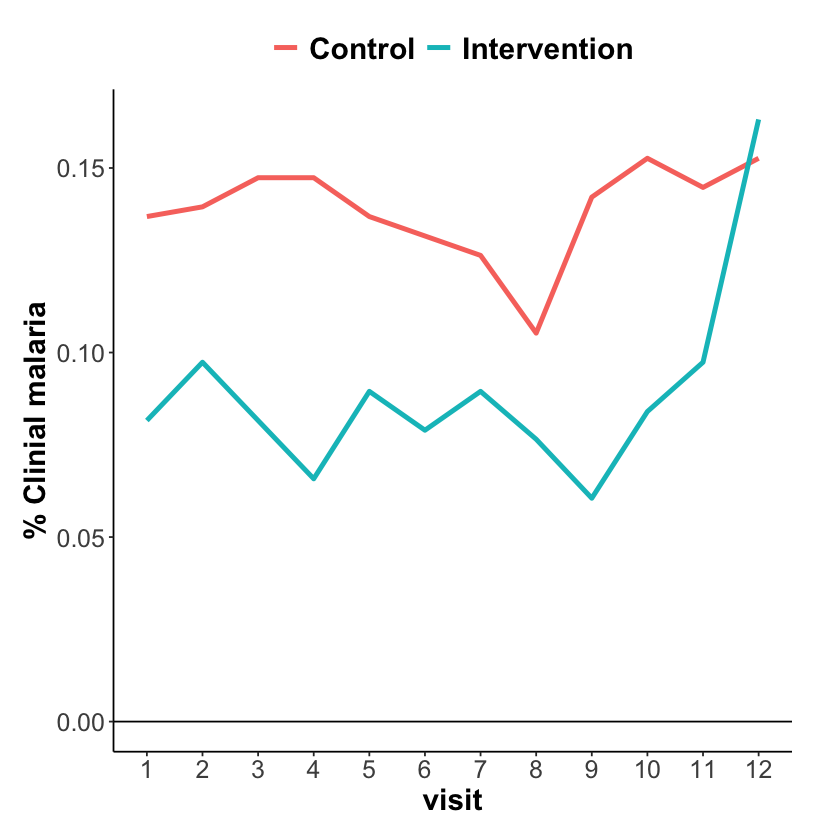

In [54]:
df_inc_raw <- left_join(df_raw2, df_baseline, by = "cohort_id") %>%
  count(visit,intervention,outcome) %>%
  group_by(visit,intervention) %>%
  mutate(prop = n/sum(n)) %>%
  filter(outcome == 1) %>%
  mutate(intervention = ifelse(intervention == 1, "Intervention", "Control"))

ggplot(NULL) +
  xlab("visit") +
  ylab("% Clinial malaria") +
  geom_line(data = df_inc_raw,
            aes(x = as.factor(visit),
                y = prop,
                colour = intervention,
                group = intervention),
            size = 1.4
  )+
  geom_hline(yintercept = 0) +
  theme

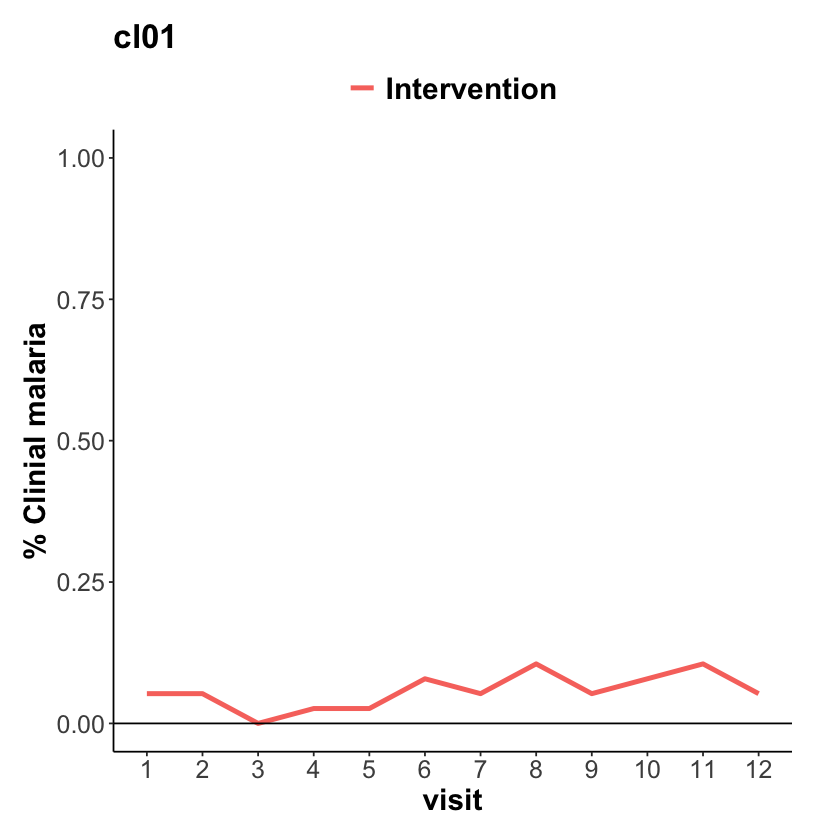

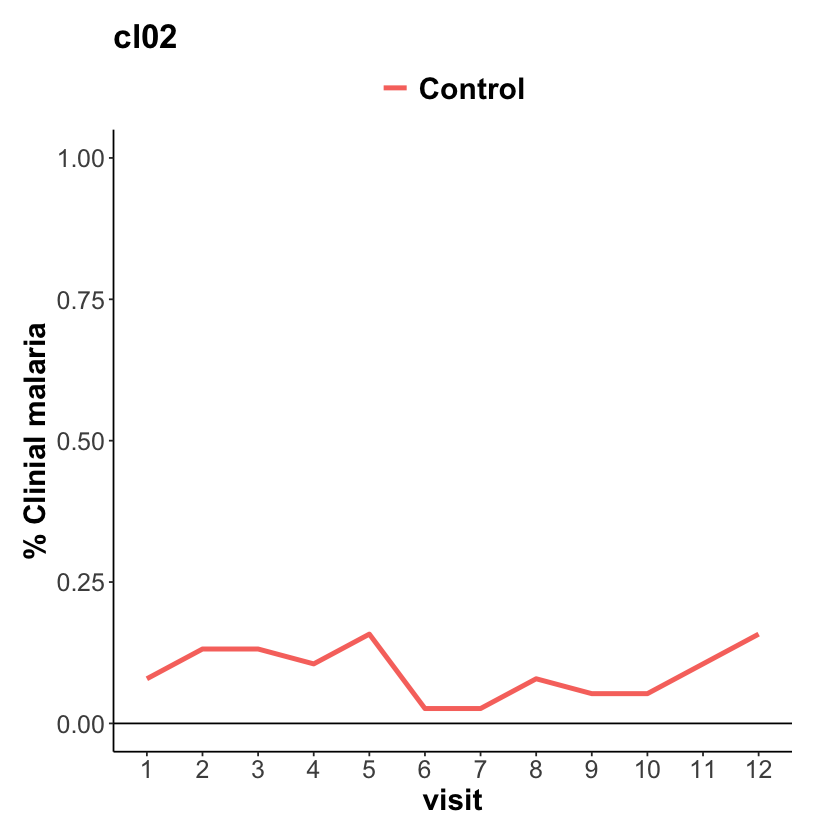

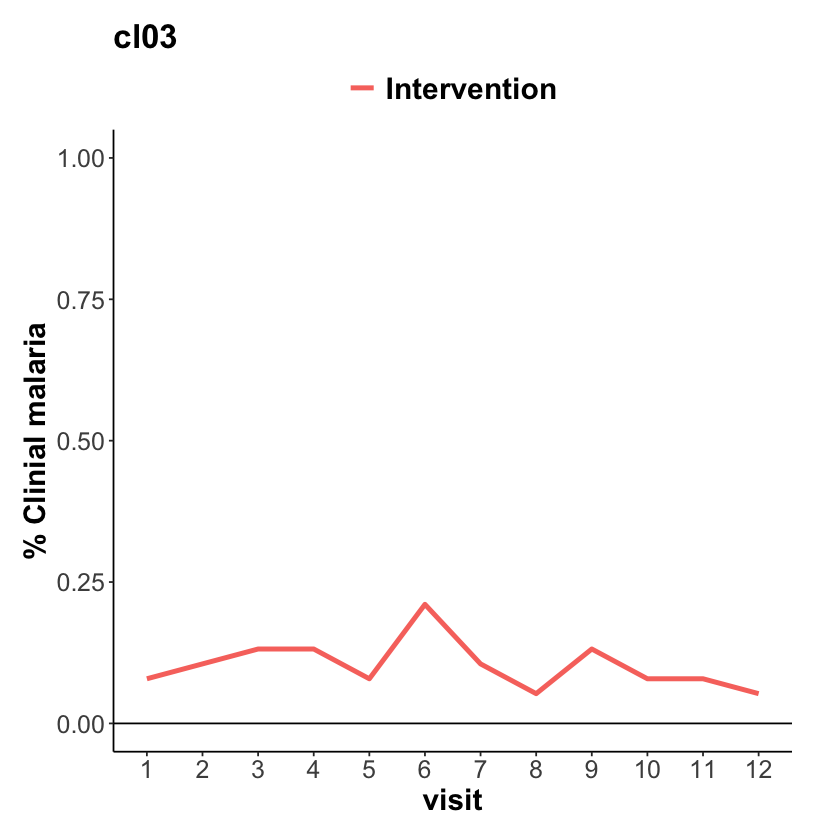

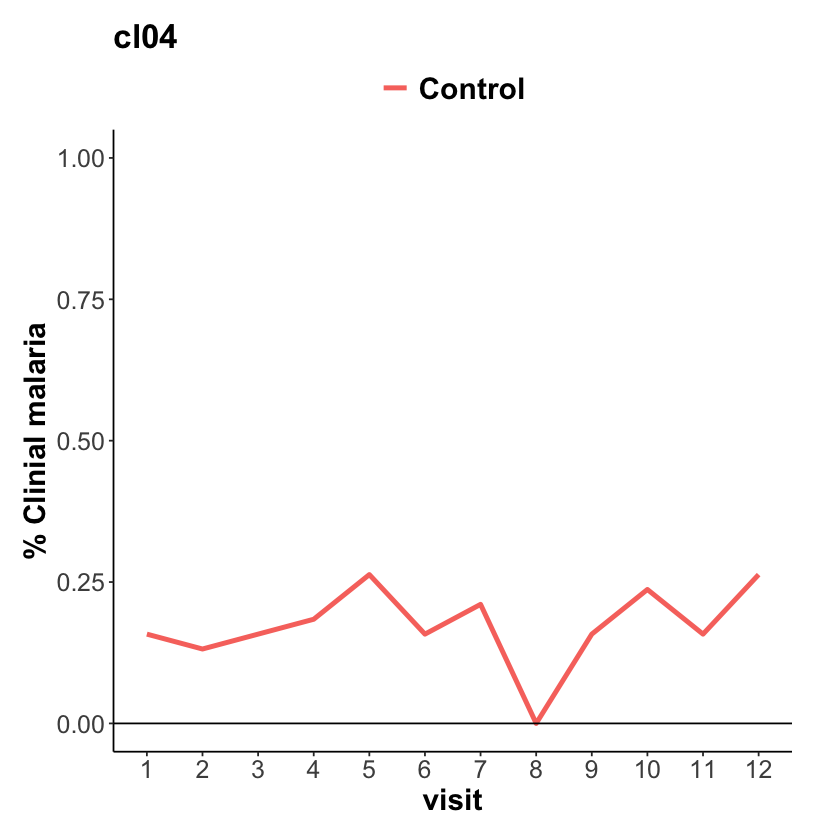

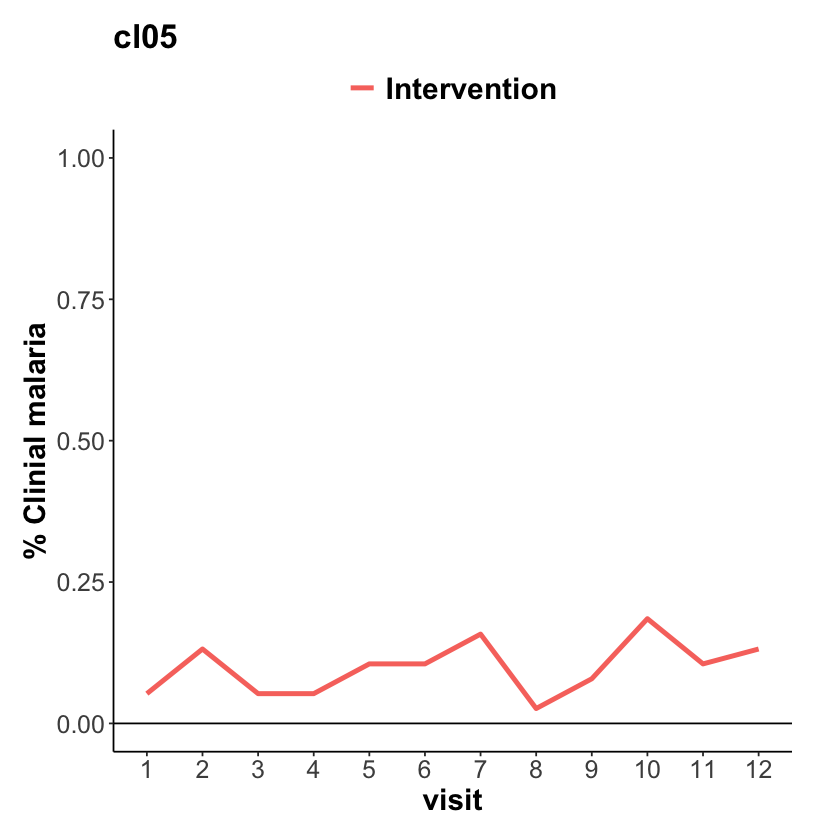

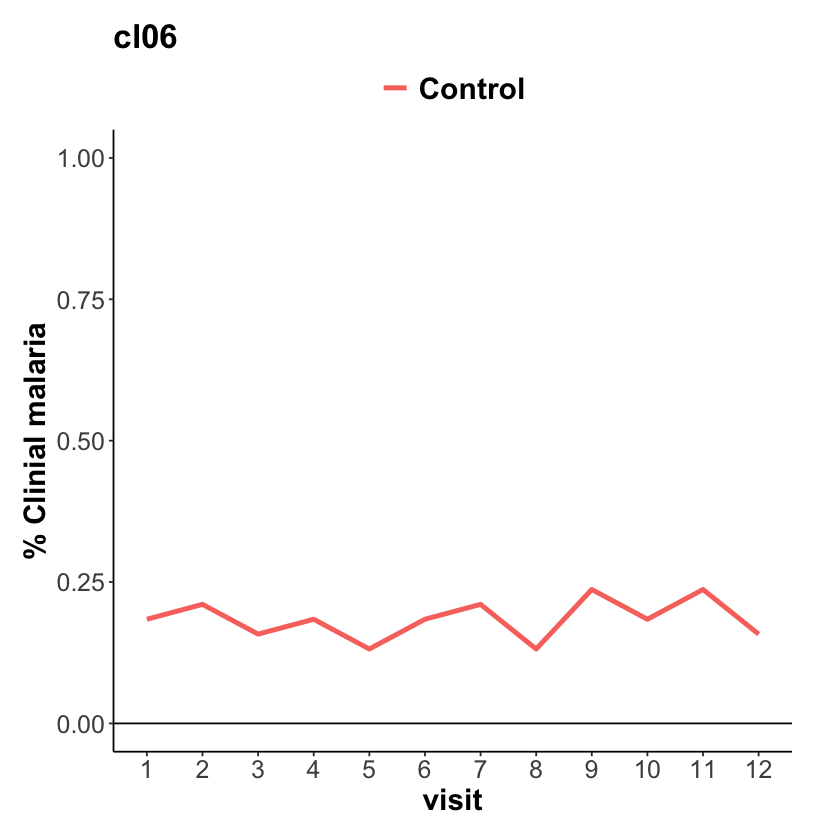

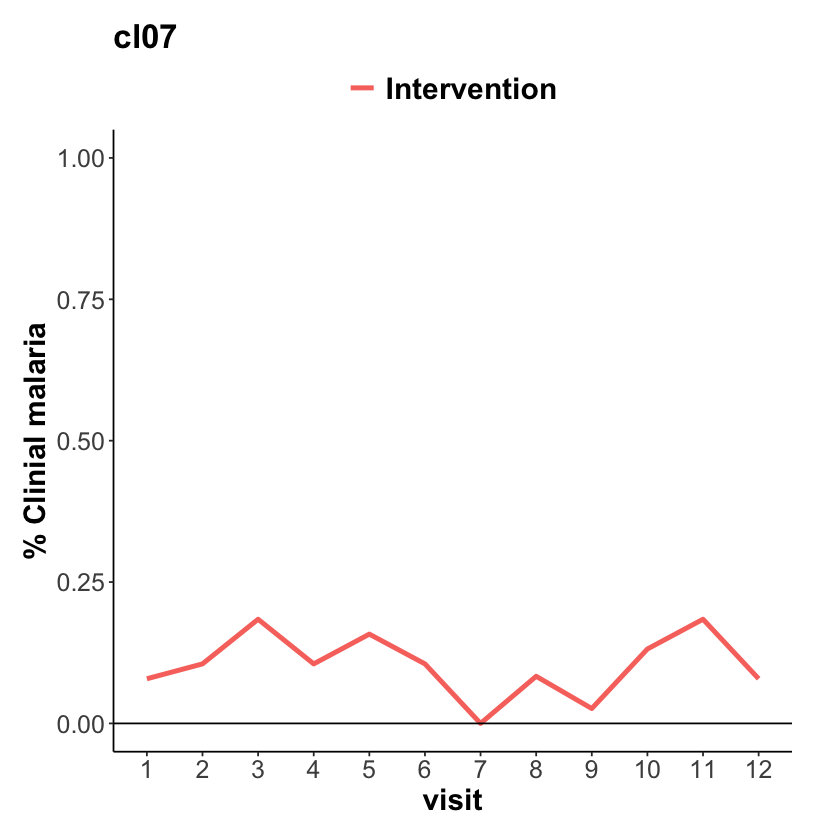

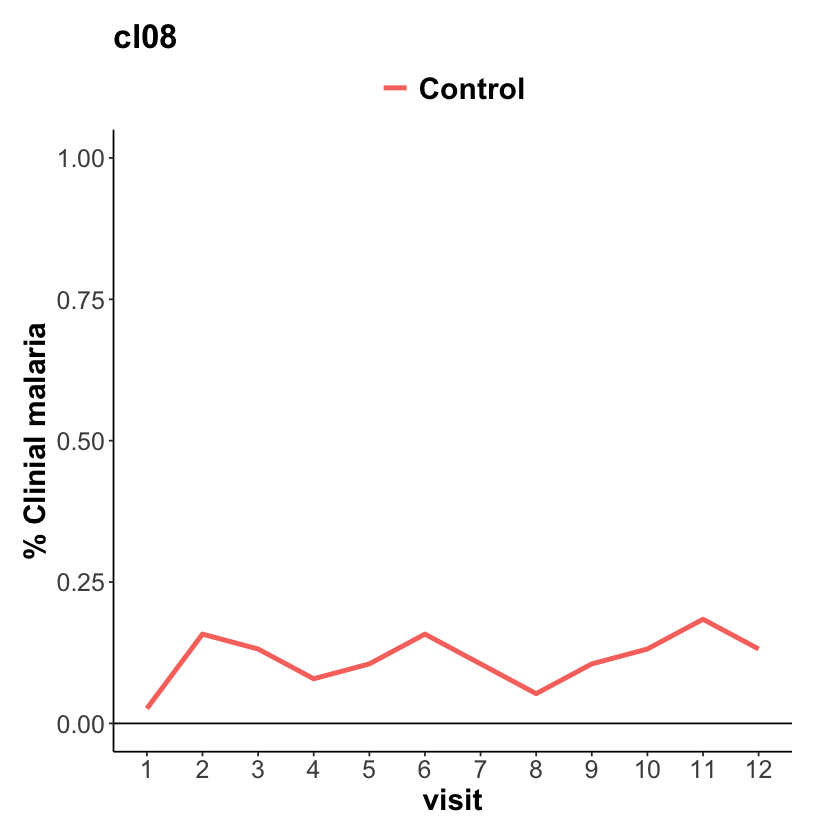

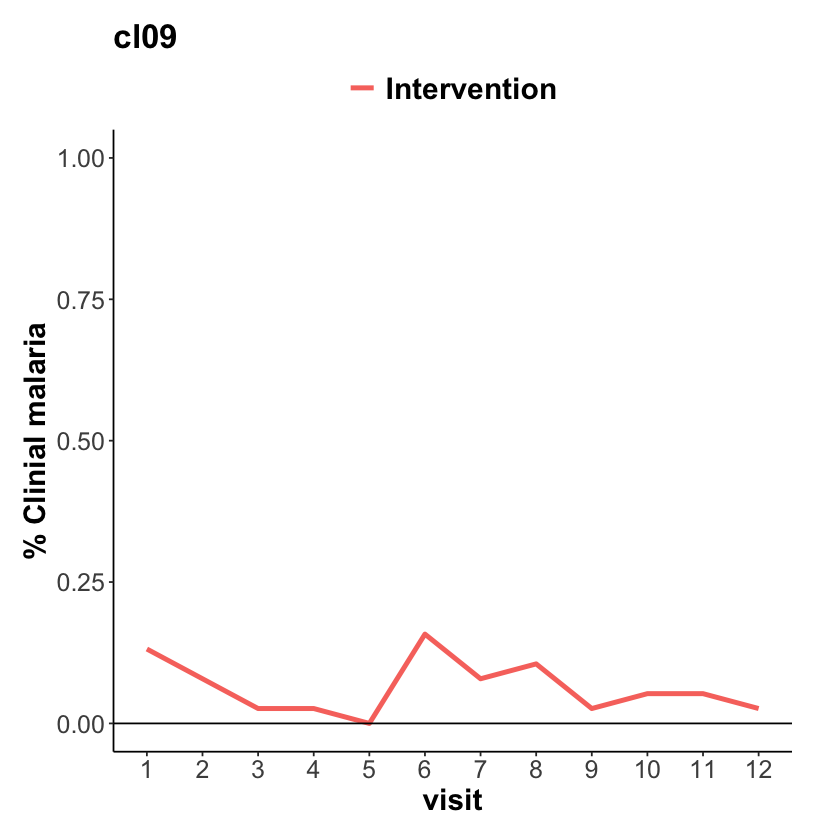

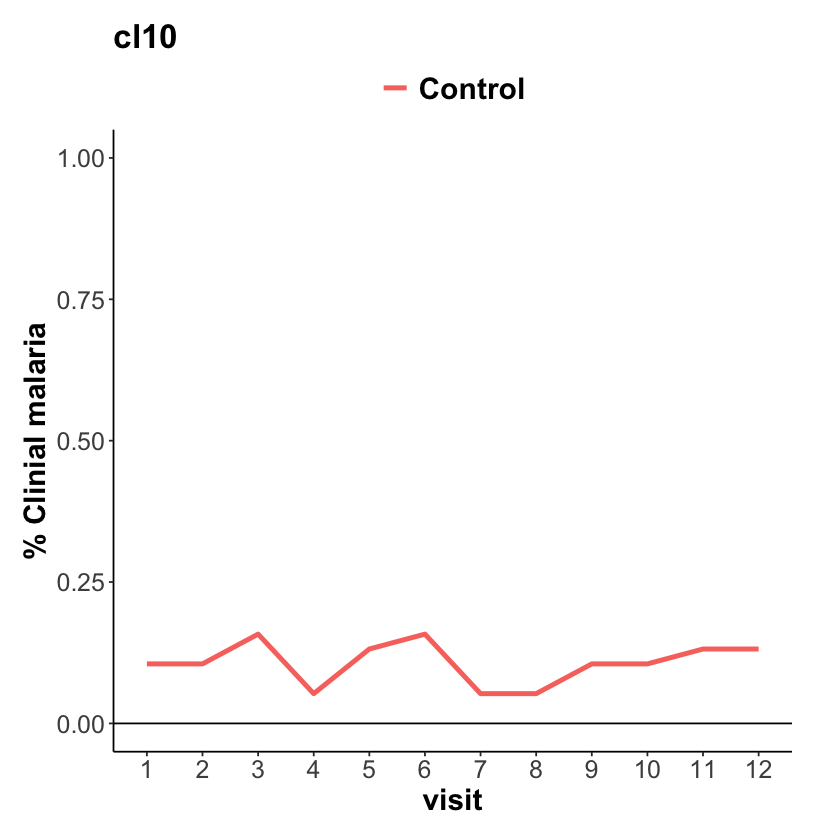

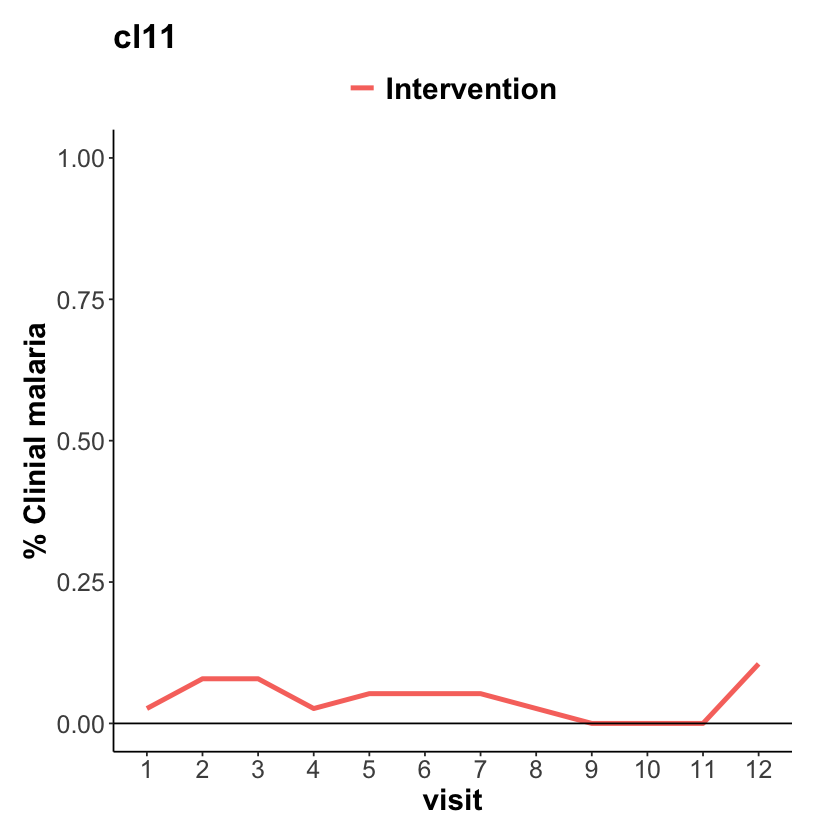

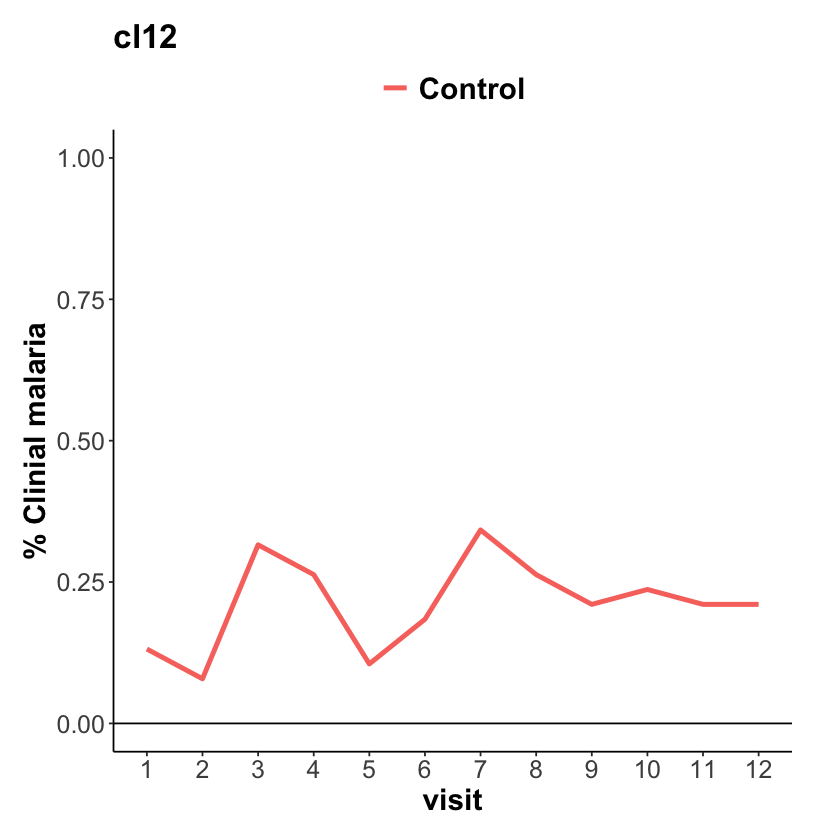

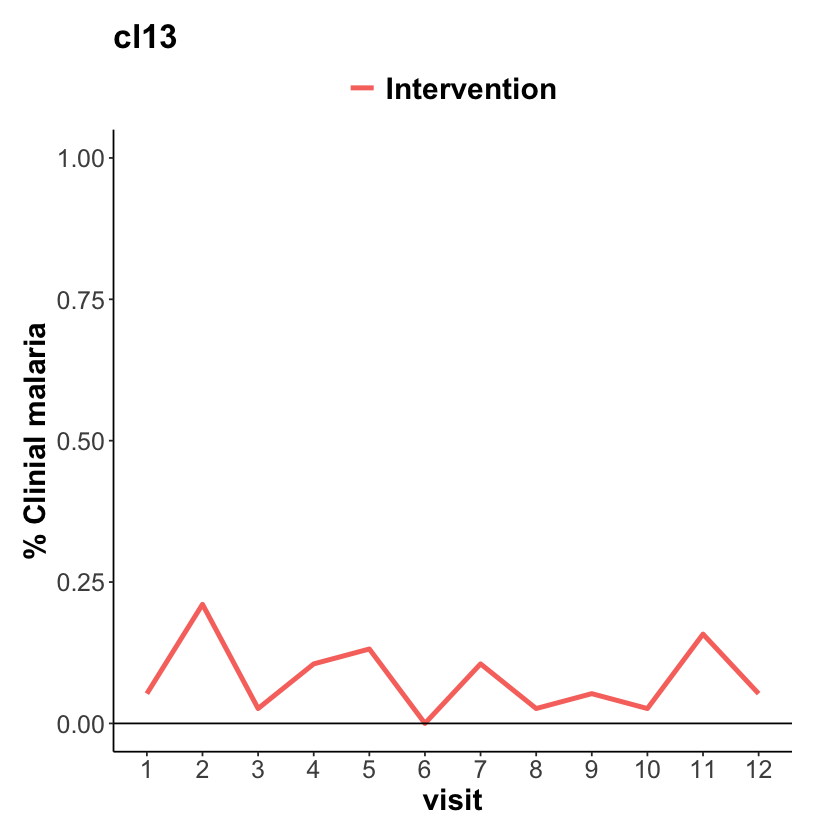

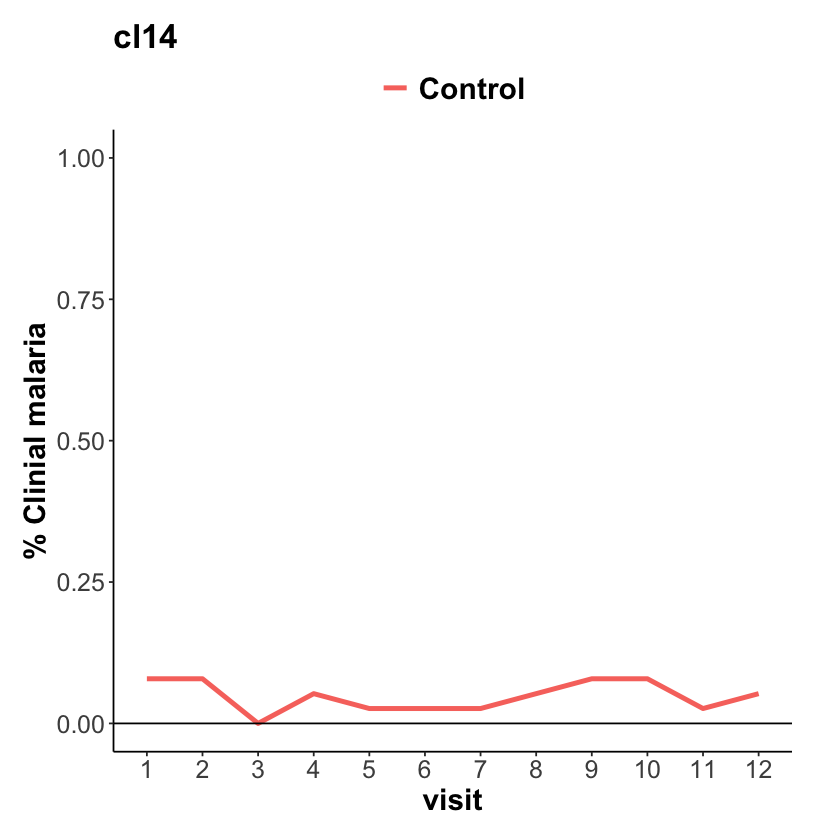

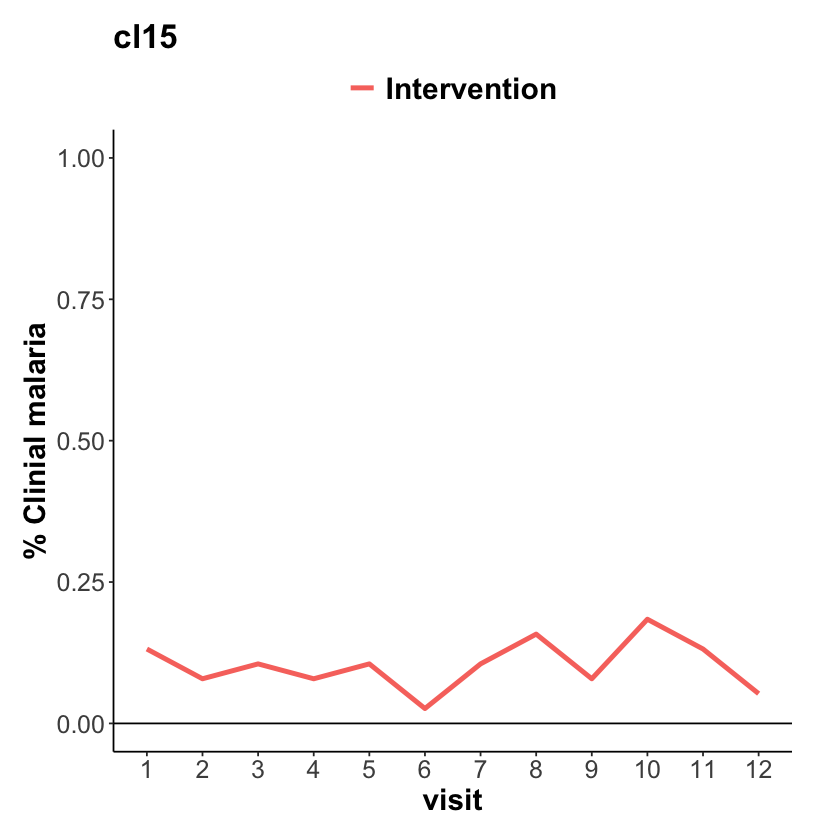

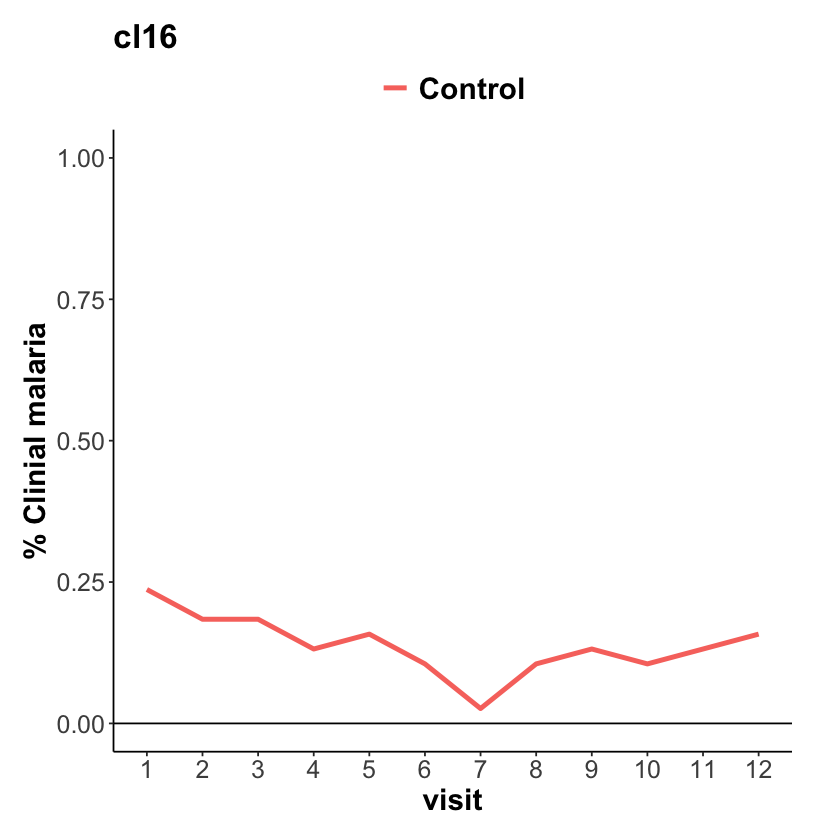

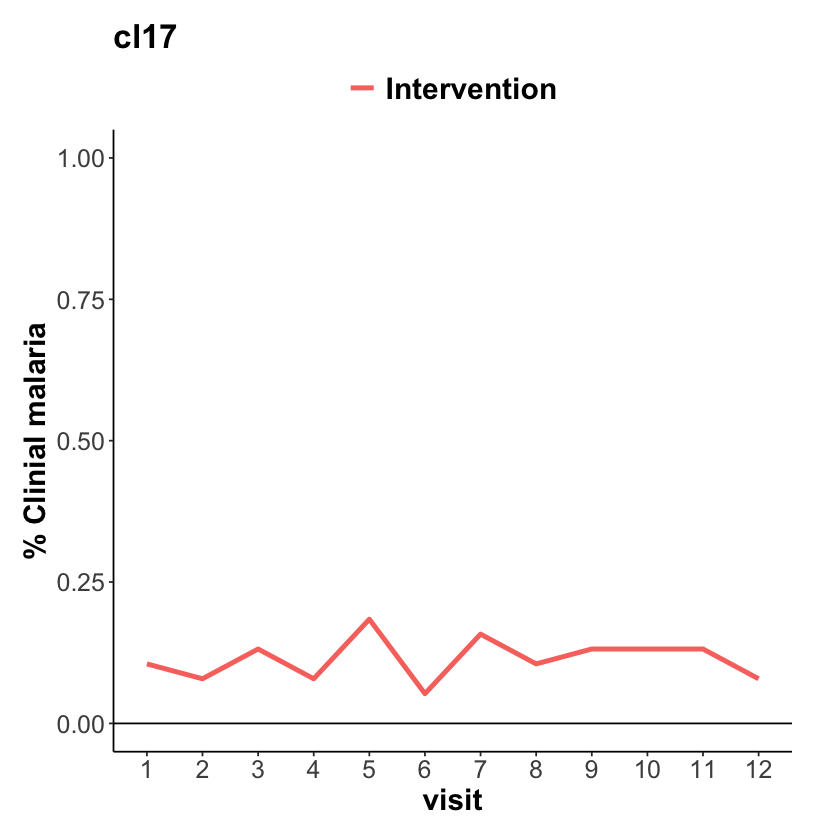

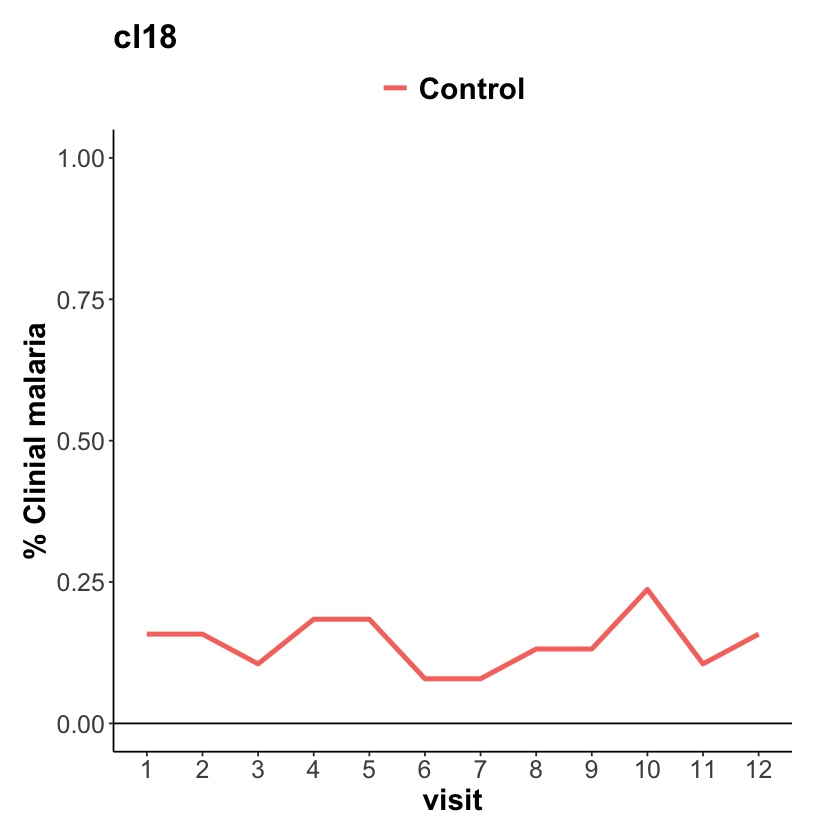

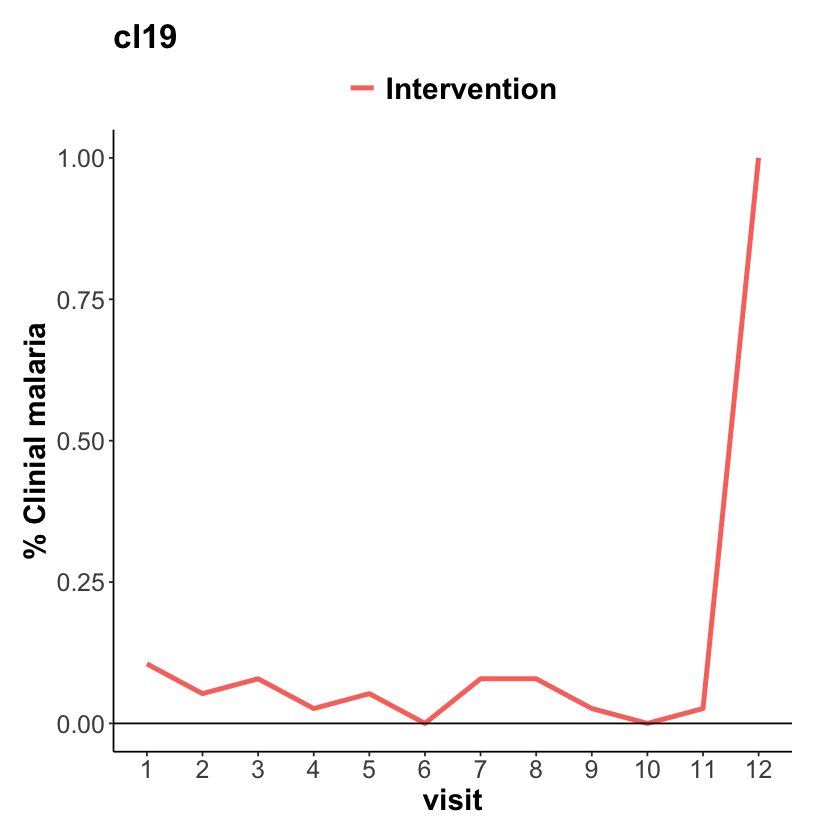

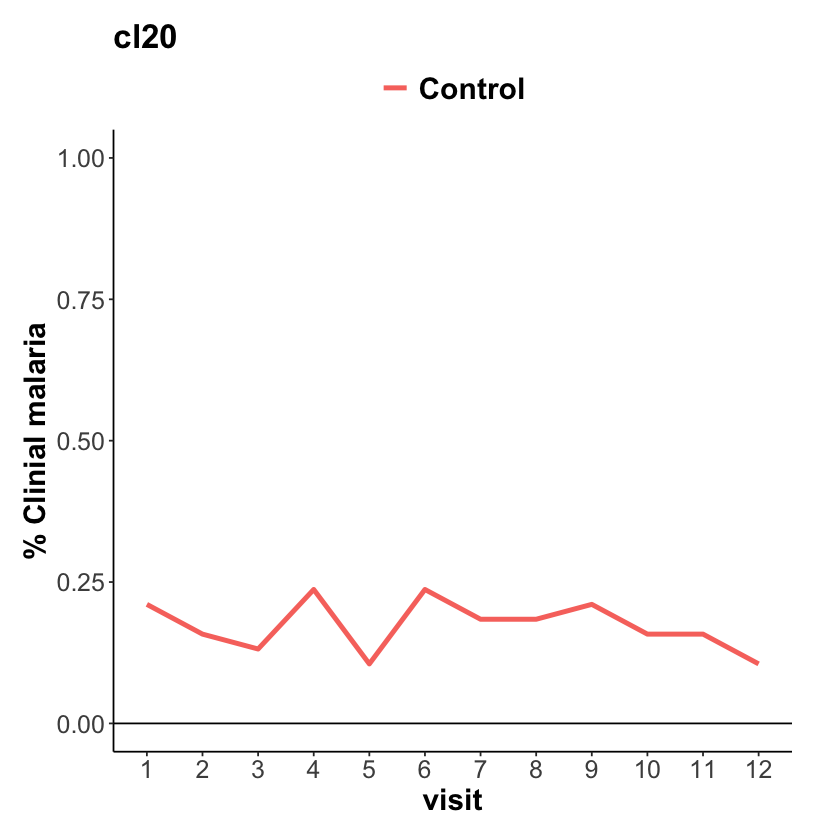

In [55]:
df_inc_raw2 <- left_join(df_raw2, df_baseline, by = c("cohort_id", "cluster_id")) %>%
  count(cluster_id, visit,intervention,outcome) %>%
  group_by(cluster_id, visit,intervention) %>%
  mutate(prop = n/sum(n)) %>%
  arrange(desc(outcome)) %>%
  distinct(cluster_id, .keep_all = T) %>%
  mutate(prop = ifelse(outcome == 0, 1-prop,prop),
         intervention = ifelse(intervention == 1, "Intervention", "Control"))

list_cluster <- unique(df_inc_raw2$cluster_id)

for (i in list_cluster){
    df_ <- df_inc_raw2 %>% filter(cluster_id == i)
    
    p_ <- ggplot(NULL) +
        ggtitle(i) +
        xlab("visit") +
        ylab("% Clinial malaria") +
        ylim(c(0,1)) +
        geom_line(data = df_,
                aes(x = as.factor(visit),
                    y = prop,
                    colour = intervention,
                    group = intervention),
                size = 1.4
        )+
        geom_hline(yintercept = 0) +
        theme
    print(p_)
    }

## Missing data

In [56]:
df_all <- left_join(df_raw2, df_baseline, by = c("cluster_id","cohort_id"))
df_all 

cluster_id,cohort_id,visit,avail,name_f,name_l,symp,rdt.x,outcome,birth,age,intervention,cn,non_bn,vac,age_c,rdt.y
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cl01,cl01_01,1,1,Sakeena,al-Hoque,0,0,0,2012-03-26,13,1,1,0,0,0,0
cl01,cl01_02,1,1,Mitchell,Gonzales,0,NA,0,2017-01-02,8,1,1,0,0,0,1
cl01,cl01_03,1,1,Anthony,Simmons,0,1,0,2024-08-15,0,1,1,0,0,1,0
cl01,cl01_04,1,1,Alyssa,Rivera,0,1,0,2016-10-03,8,1,1,0,0,0,0
cl01,cl01_05,1,1,Timothy,Vlajic,0,0,0,2015-09-10,9,1,1,0,0,0,0
cl01,cl01_06,1,1,Mana,White,1,0,0,2018-08-09,6,1,1,0,1,0,0
cl01,cl01_07,1,1,Chykeiljah,Rea,1,NA,NA,2022-05-22,2,1,1,0,1,1,0
cl01,cl01_08,1,1,Laneesha,Rusk,0,1,0,2011-07-23,13,1,1,0,0,0,0
cl01,cl01_09,1,1,Mujaahida,el-Malak,0,0,0,2021-01-02,4,1,1,0,1,0,0


In [57]:
df_n_record <- df_all %>% 
    count(cluster_id, visit)
df_n_record

cluster_id,visit,n
<chr>,<int>,<int>
cl01,1,38
cl01,2,38
cl01,3,38
cl01,4,38
cl01,5,38
cl01,6,38
cl01,7,38
cl01,8,38
cl01,9,38


In [50]:
df_n_record %>% filter(n != 38)

cluster_id,visit,n
<chr>,<int>,<int>
cl05,10,27
cl07,8,24


In [58]:
df_n_avail <- df_all %>% 
    count(cluster_id, visit, avail) %>% 
    filter(avail == 1)
head(df_n_avail,10)

,cluster_id,visit,avail,n
,<chr>,<int>,<int>,<int>
1,cl01,1,1,36
2,cl01,2,1,33
3,cl01,3,1,37
4,cl01,4,1,36
5,cl01,5,1,38
6,cl01,6,1,38
7,cl01,7,1,38
8,cl01,8,1,36
9,cl01,9,1,34


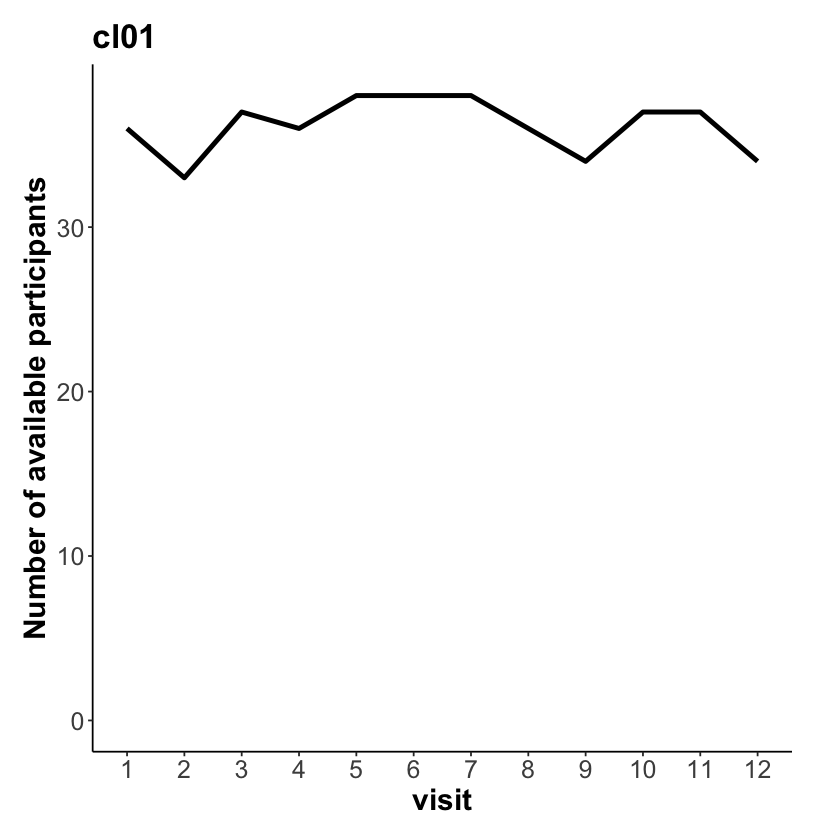

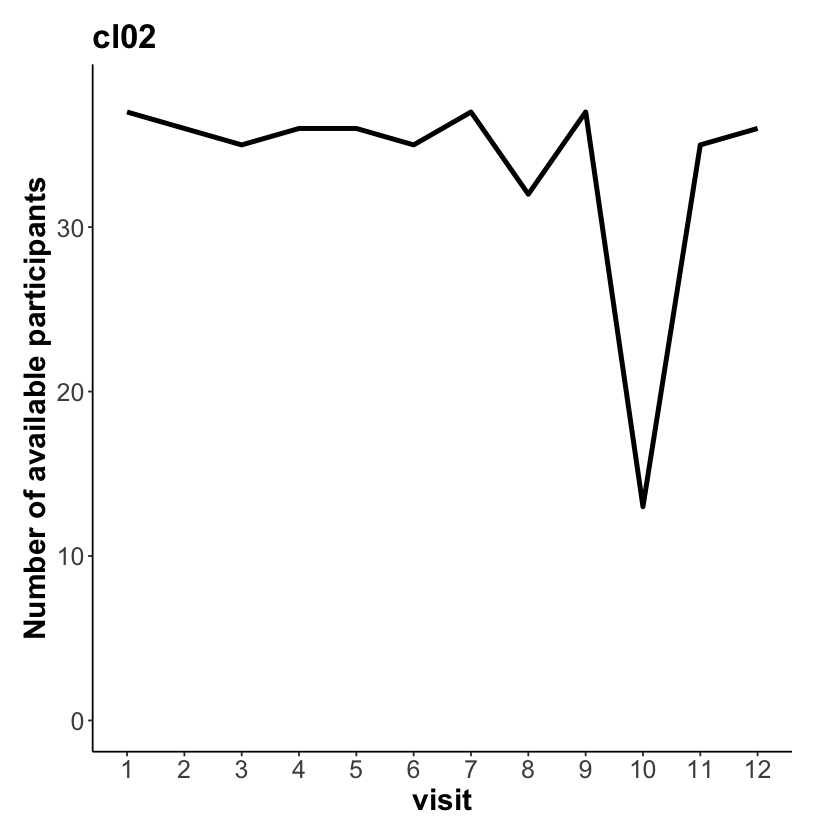

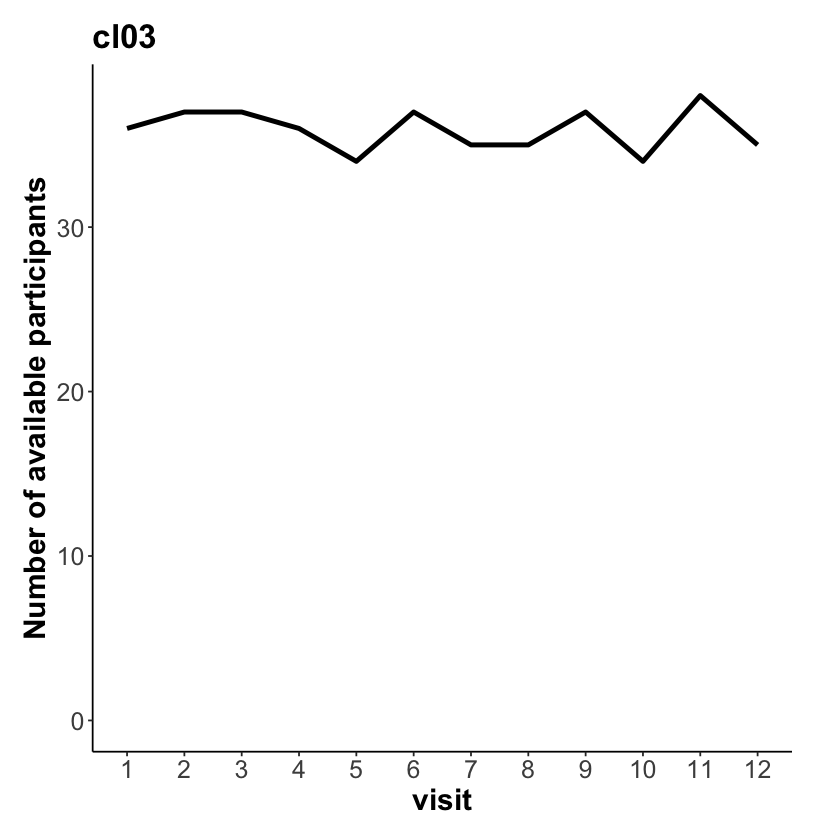

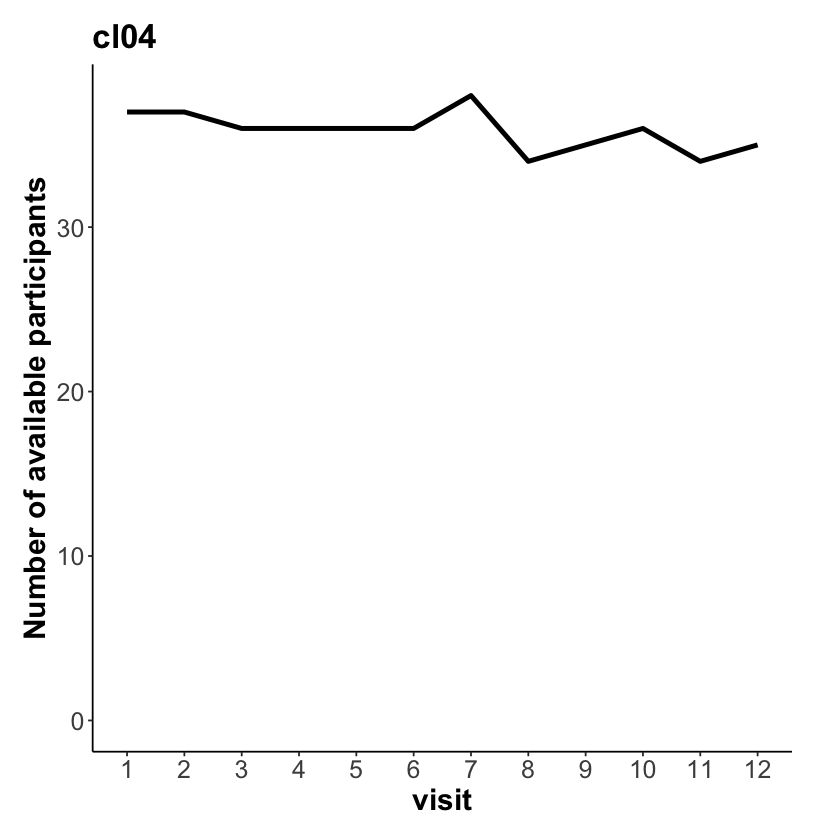

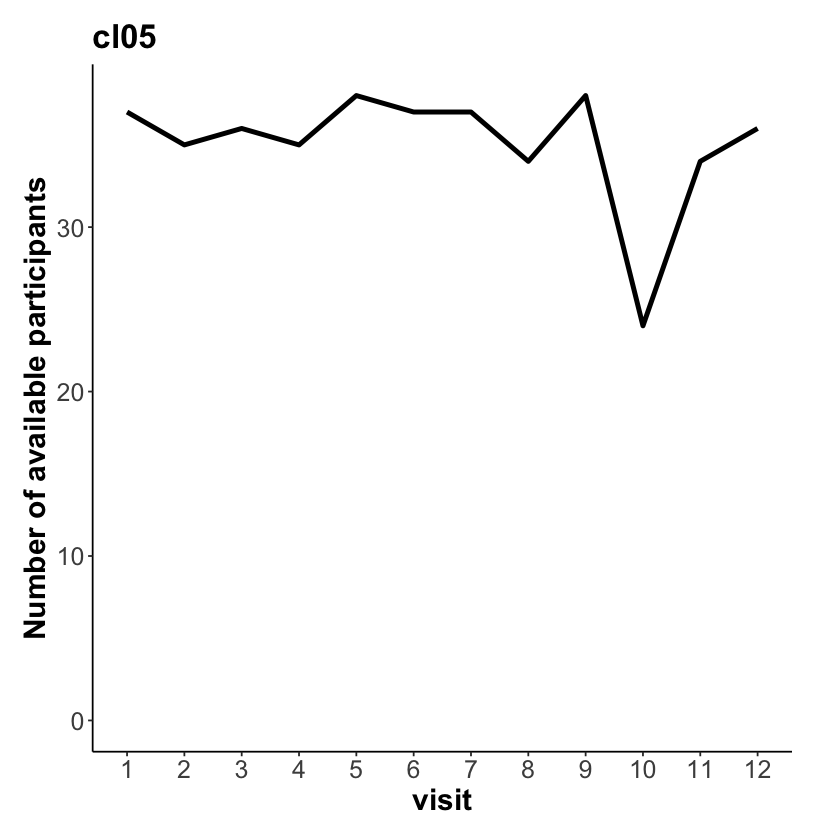

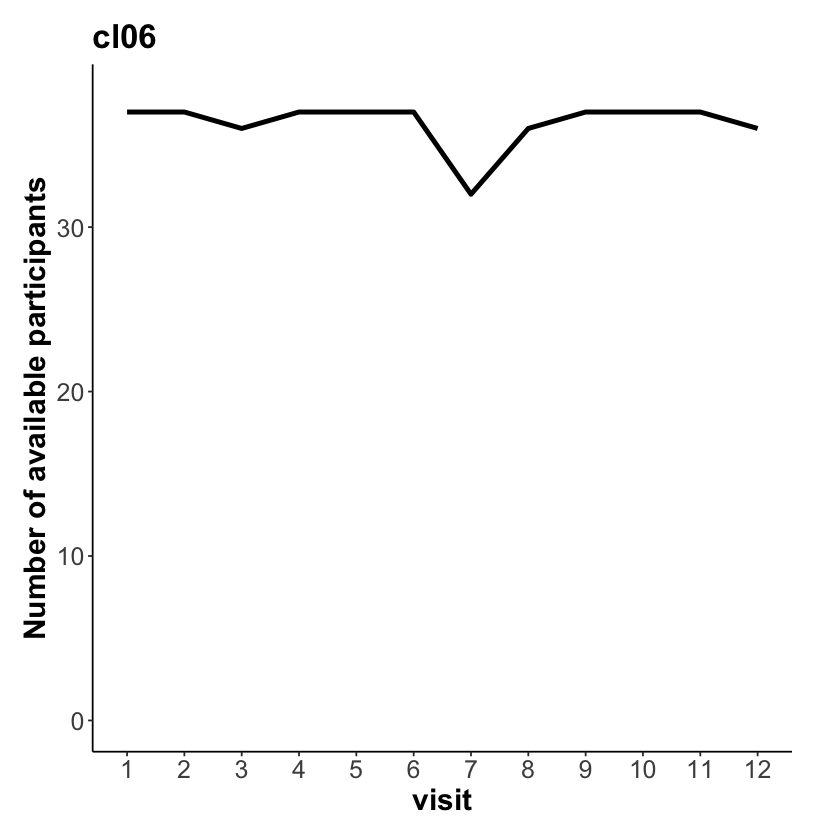

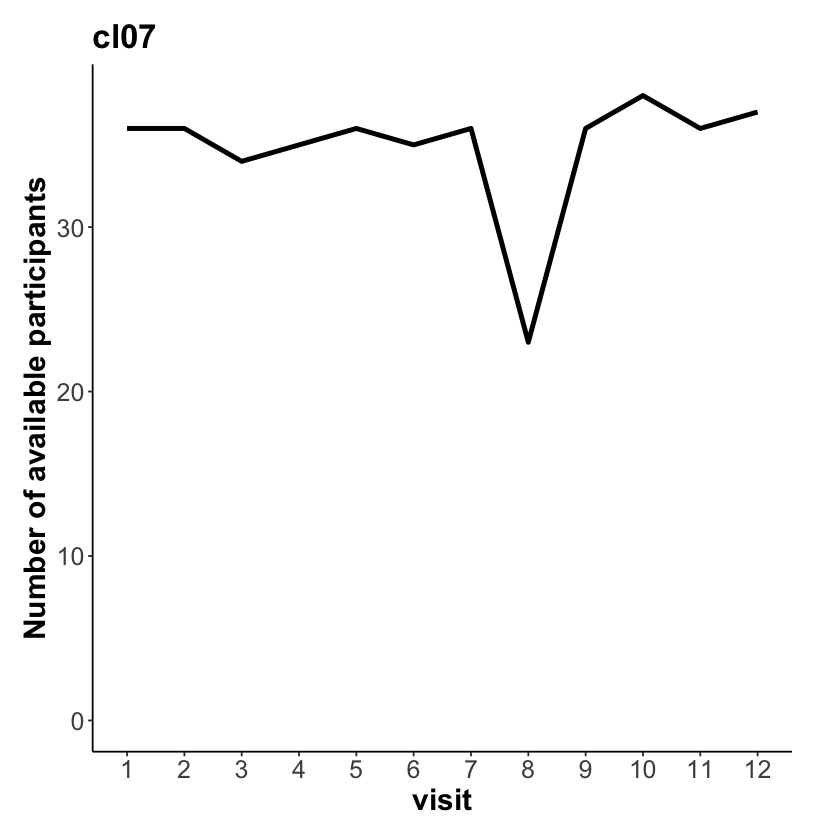

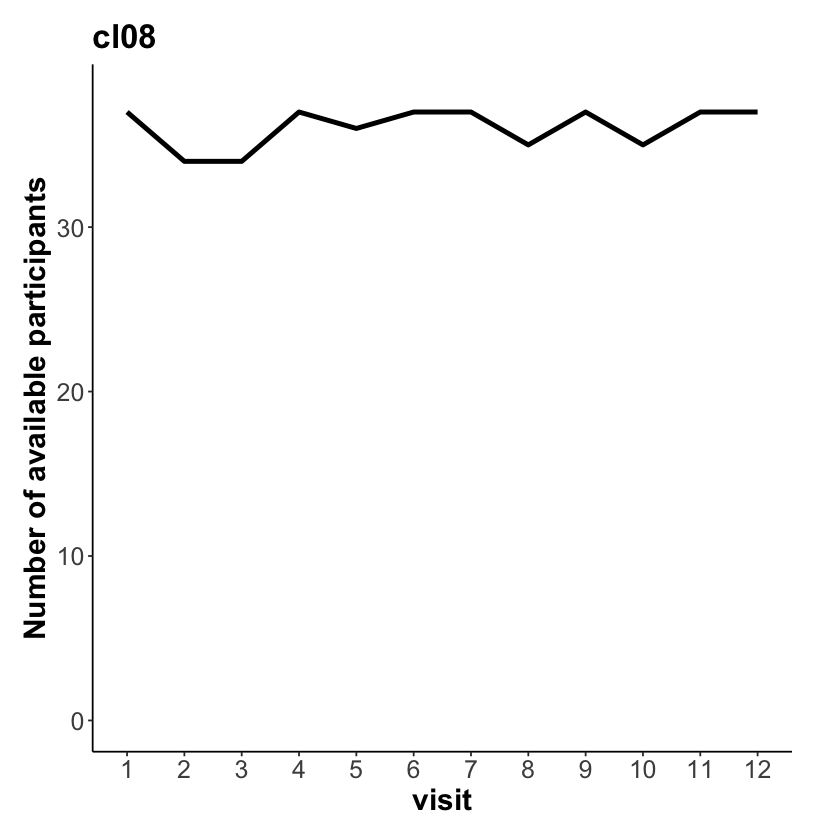

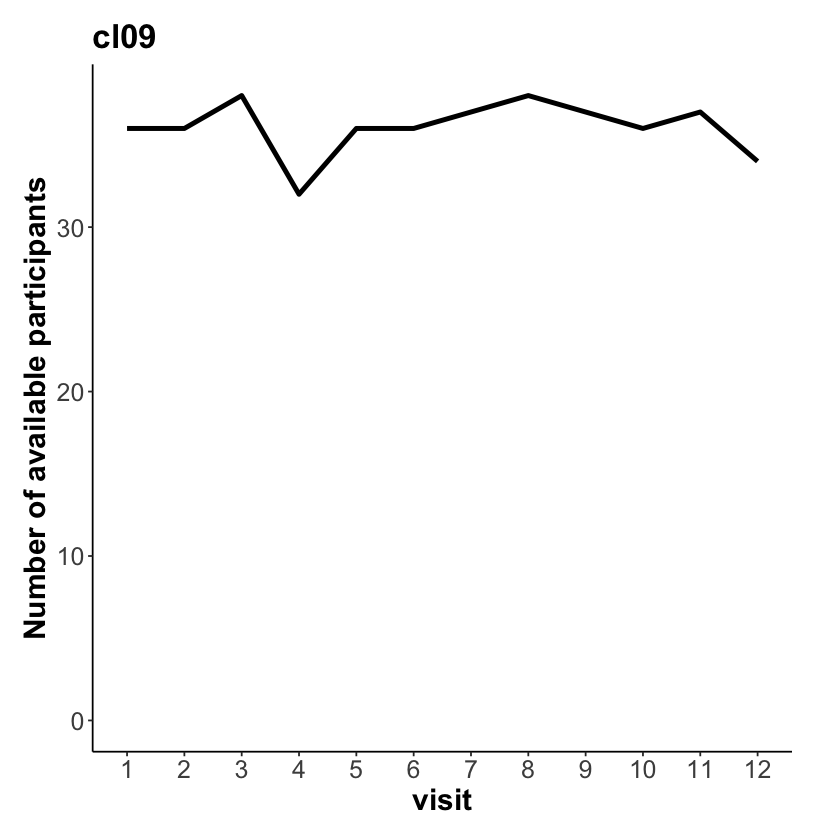

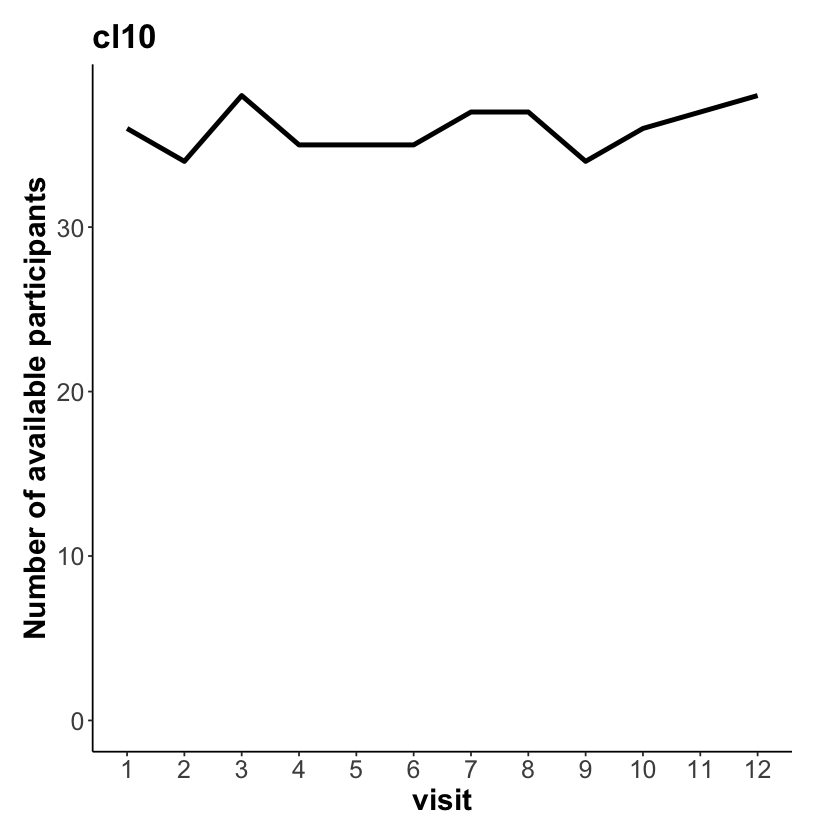

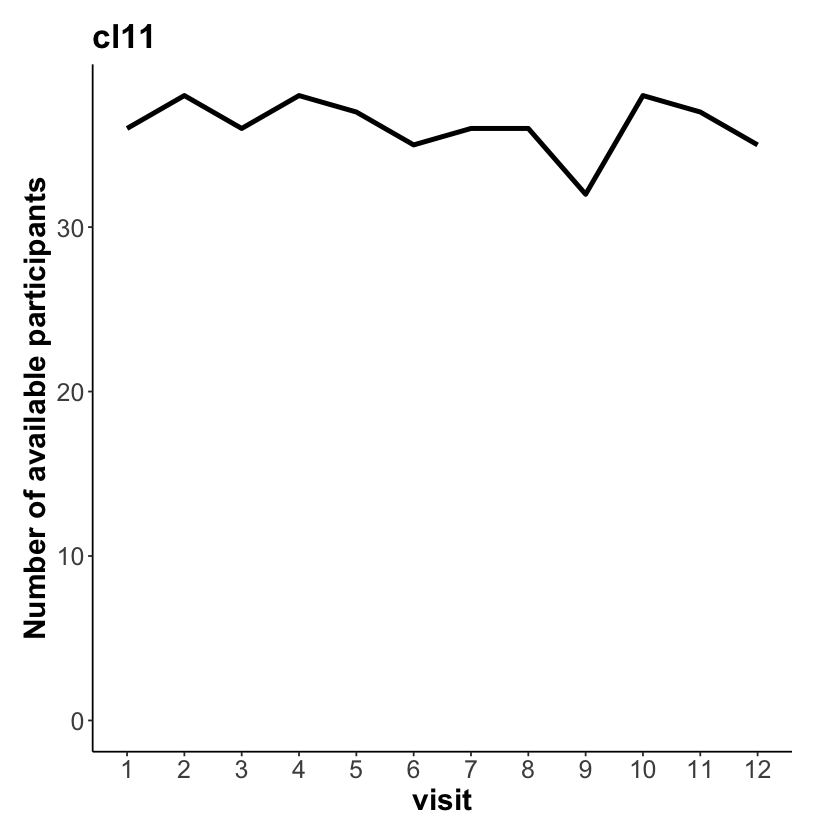

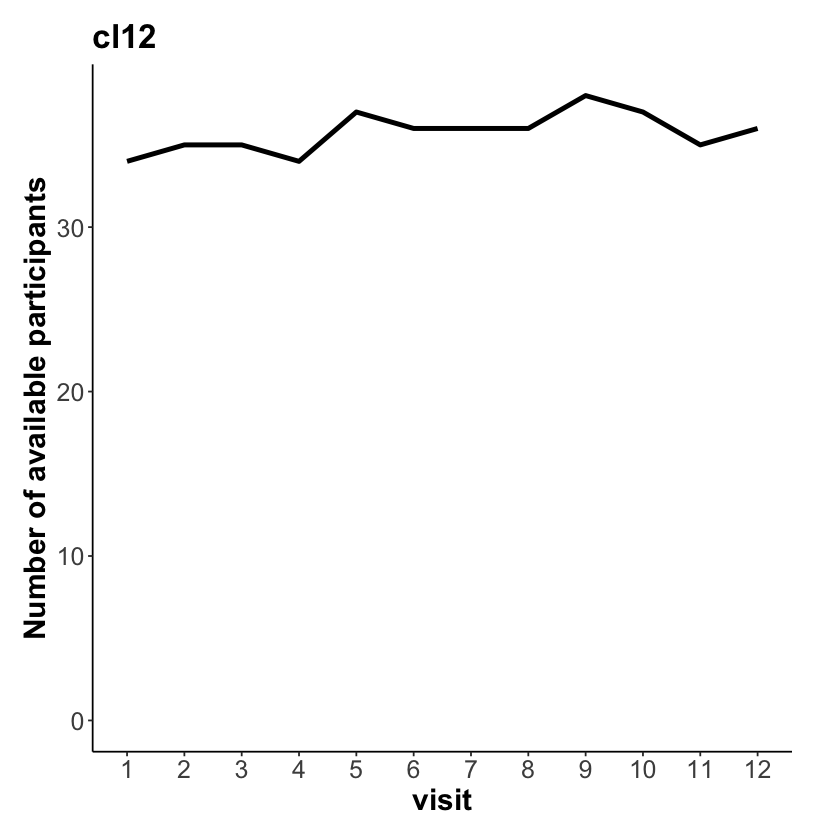

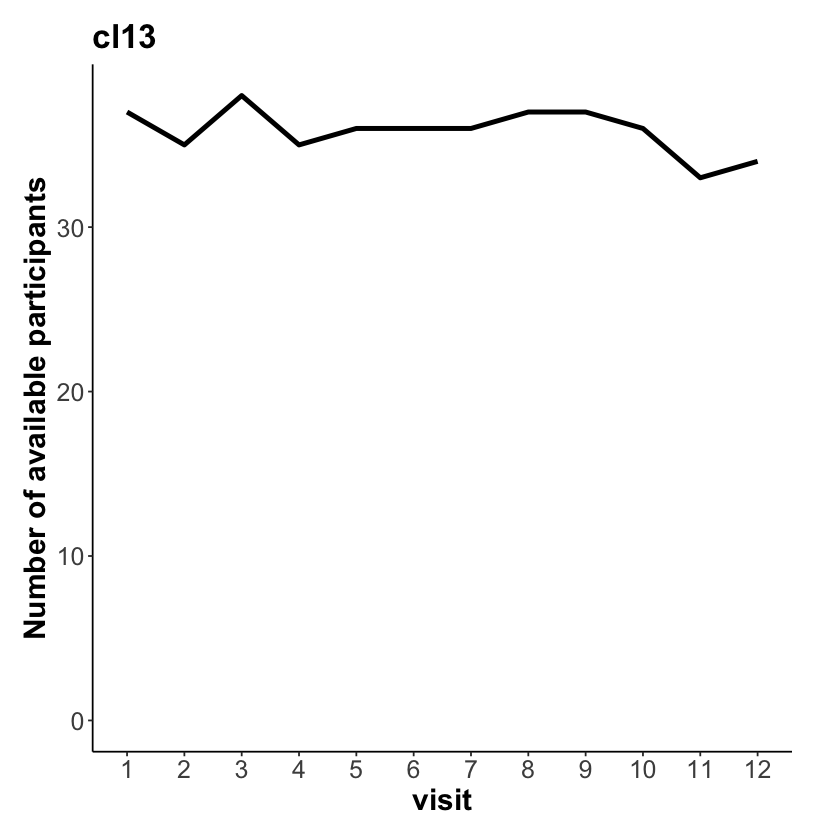

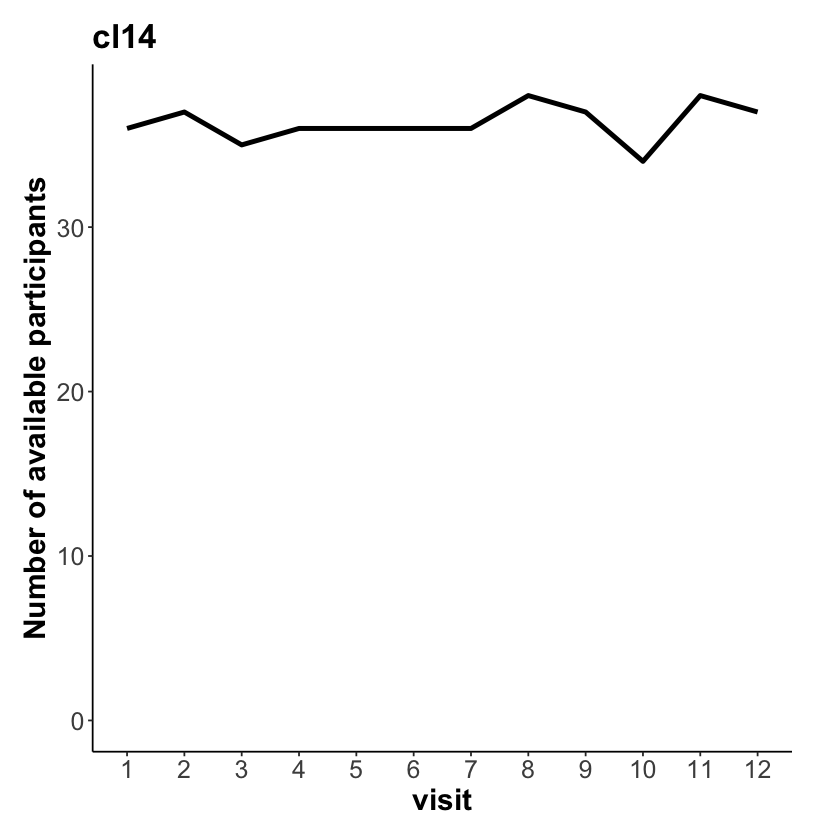

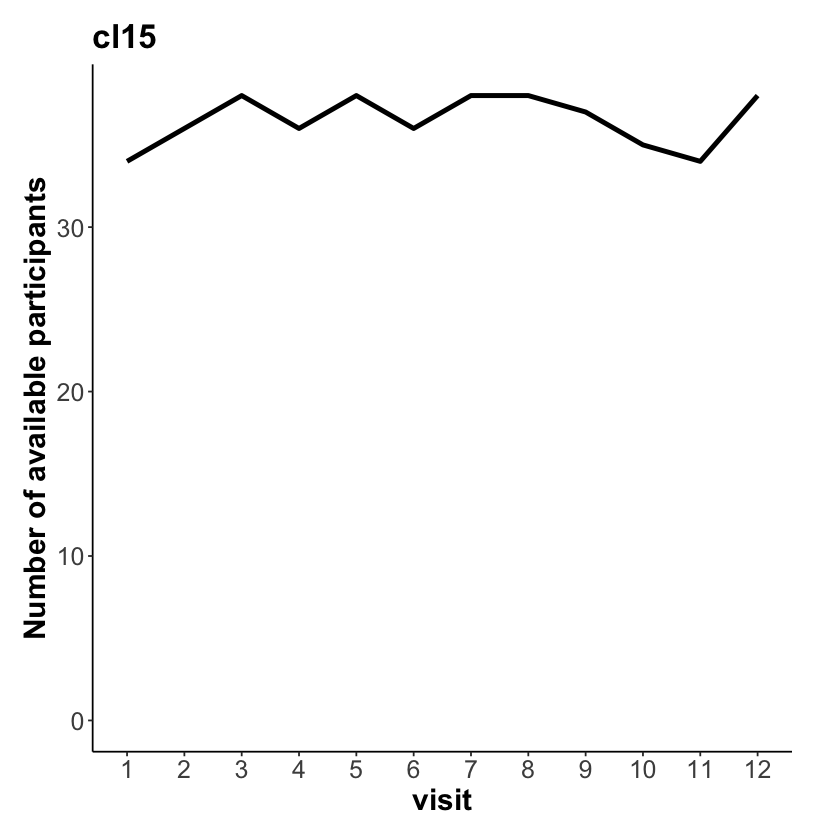

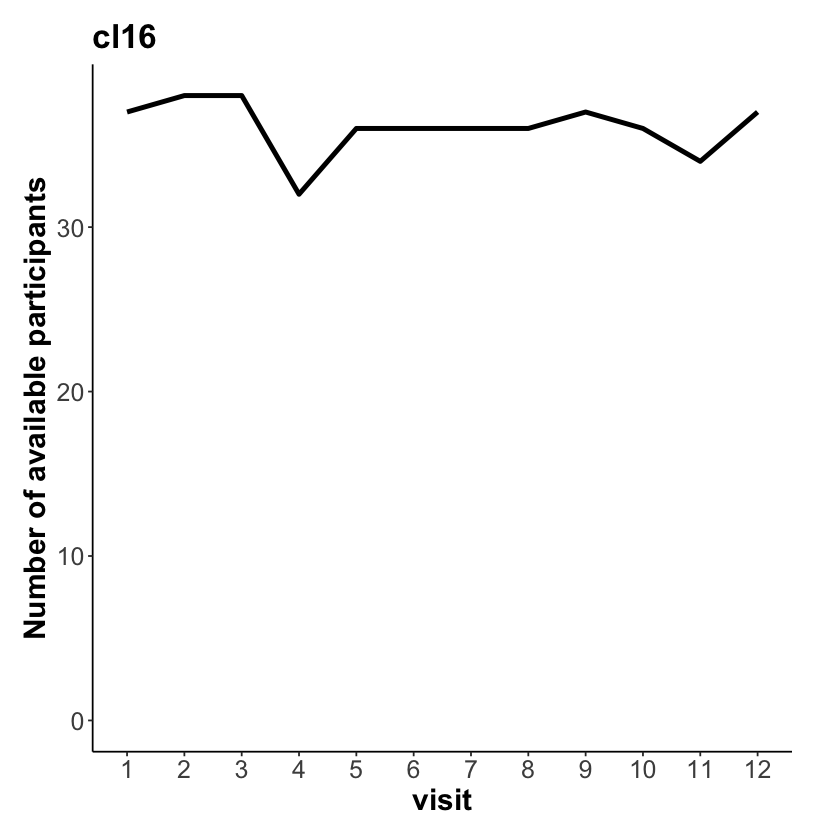

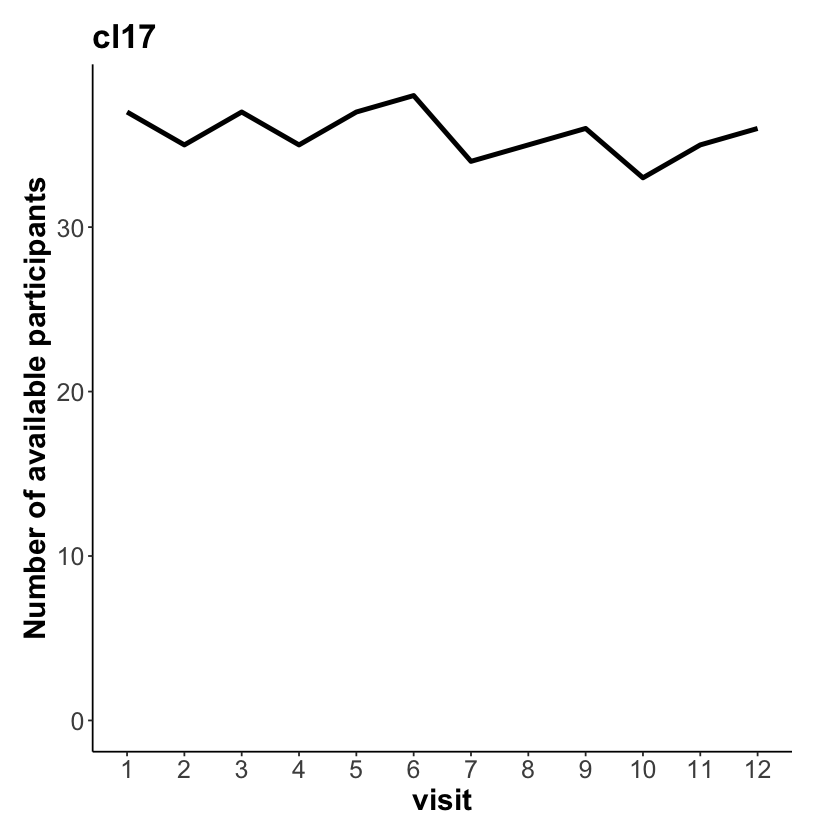

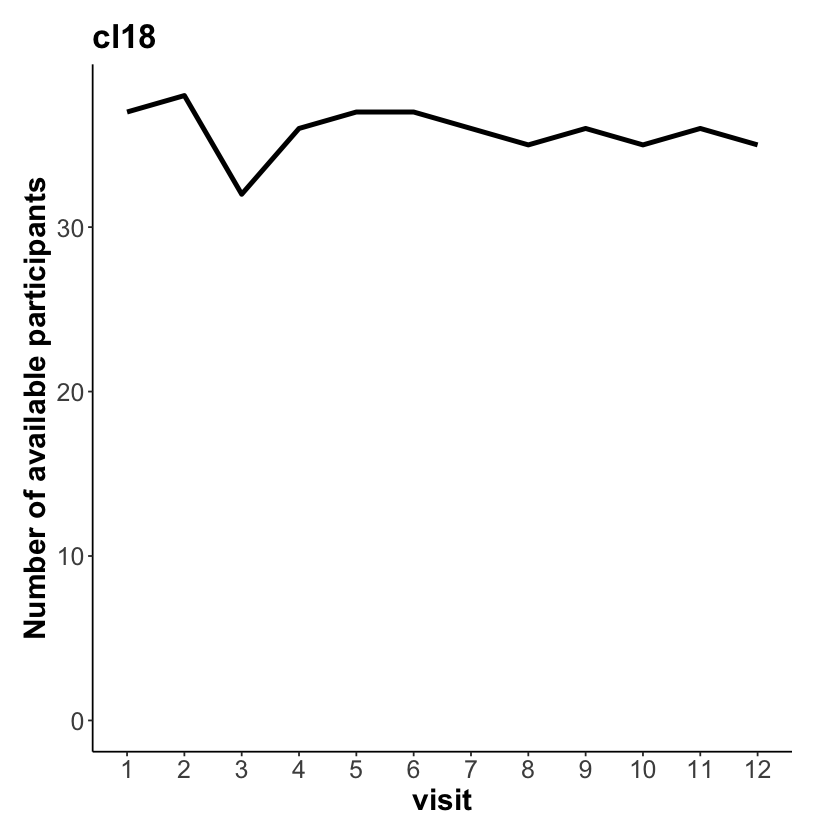

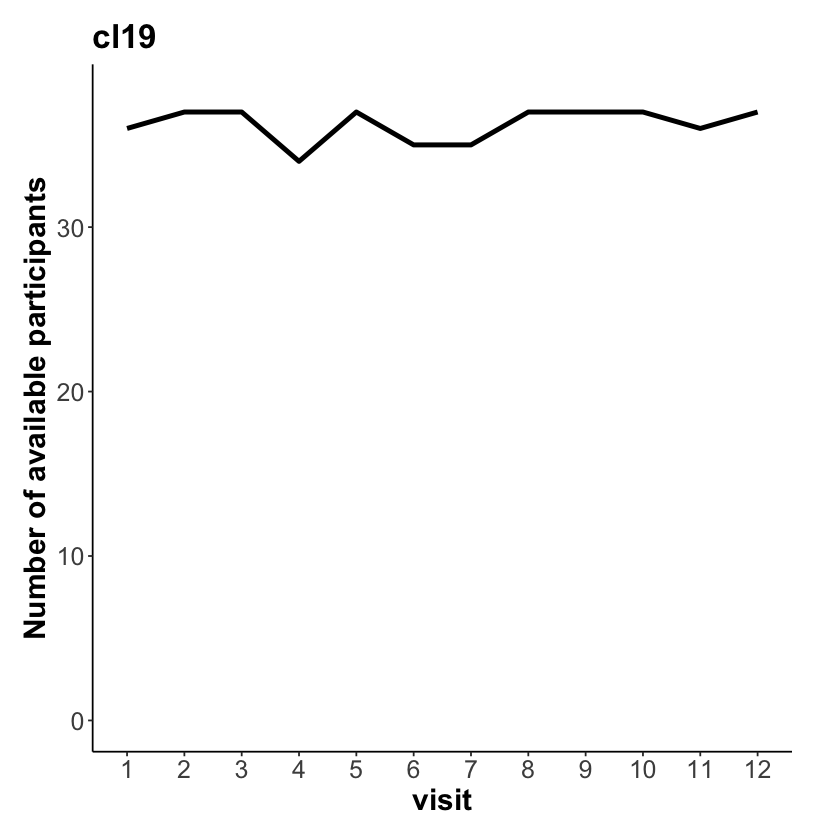

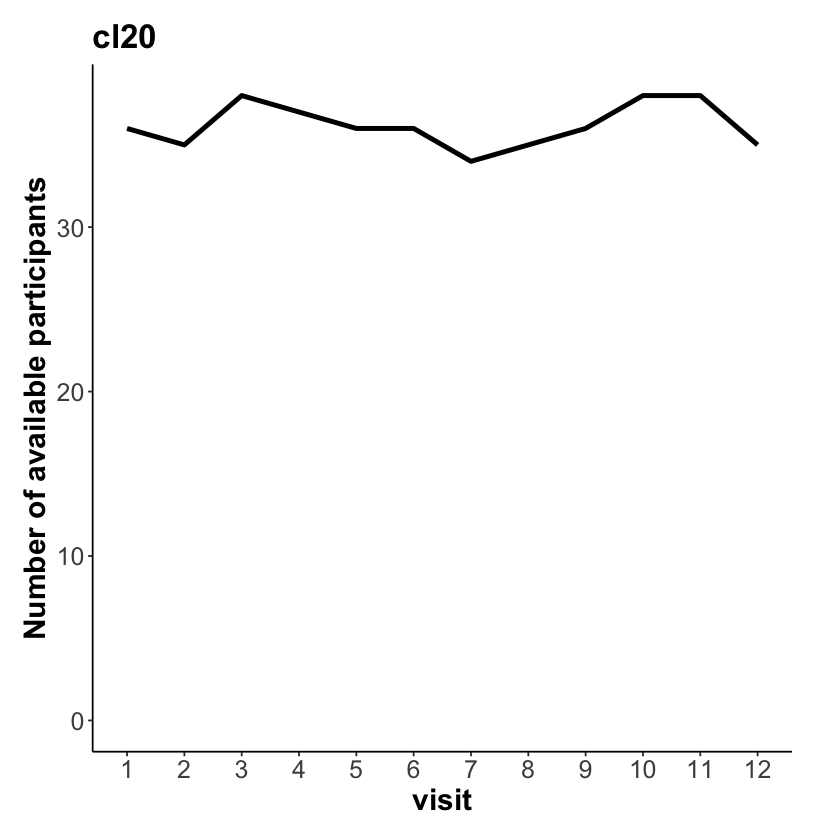

In [59]:
list_cluster <- unique(df_n_avail$cluster_id)

for (i in list_cluster){
    df_ <- df_n_avail %>% filter(cluster_id == i)
    
    p_ <- ggplot(NULL) +
        ggtitle(i) +
        ylim(c(0,38)) +
        xlab("visit") +
        ylab("Number of available participants") +
        geom_line(data = df_,
                aes(x = as.factor(visit),
                    y = n,
                    group = cluster_id),
                size = 1.4
        )+
        theme
    print(p_)
    }

In [61]:
# missing Outcomes
df_all %>% 
    filter(avail == 1) %>% 
    filter(is.na(outcome))


cluster_id,cohort_id,visit,avail,name_f,name_l,symp,rdt.x,outcome,birth,age,intervention,cn,non_bn,vac,age_c,rdt.y
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cl01,cl01_07,1,1,Chykeiljah,Rea,1,NA,NA,2022-05-22,2,1,1,0,1,1,0
cl16,cl16_10,5,1,Karleina,Weber,1,NA,NA,2012-04-21,12,0,0,0,0,0,0
cl16,cl16_20,5,1,Joshua,Nichols,1,NA,NA,2016-06-21,8,0,0,0,0,0,0


## Incorrect name

In [51]:
df_name <- df_all %>% 
    ungroup() %>% 
    rename(name_cohort_f = "name_f",
           name_cohort_l = "name_l") %>% 
    left_join(df_cohort, df_cohort, by = c("cluster_id", "cohort_id")) %>% 
    dplyr::select(cluster_id, cohort_id, visit, name_cohort_f, name_cohort_l, name_f, name_l) %>% 
    filter(name_cohort_f != name_f) 


In [52]:
df_name$name_cohort_f[[1]]
df_cohort$name_f[[1]]

[1] "Sakeena"

[1] " Sakeena"

In [53]:
df_name <- df_all %>% 
    ungroup() %>% 
    rename(name_cohort_f = "name_f",
           name_cohort_l = "name_l") %>% 
    left_join(df_cohort, df_cohort, by = c("cluster_id", "cohort_id")) %>% 
    dplyr::select(cluster_id, cohort_id, visit, name_cohort_f, name_cohort_l, name_f, name_l) %>% 
    mutate(name_cohort_f = str_replace_all(name_cohort_f, " ", ""),
           name_f = str_replace_all(name_f, " ", "")) %>% 
    filter(name_cohort_f != name_f) 

df_name

cluster_id,cohort_id,visit,name_cohort_f,name_cohort_l,name_f,name_l
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
cl04,cl04_06,1,Myteuc,Phi,Mytruc,Phi
cl06,cl06_22,1,Briannp,John,Brianna,John
cl06,cl06_29,1,Nroc,Terry,Ngoc,Terry
cl11,cl11_18,1,Nrtaly,Ruiz,Nataly,Ruiz
cl12,cl12_03,1,Kayls,Harpham,Kayla,Harpham
cl18,cl18_35,1,Arianr,Harris,Ariana,Harris
cl20,cl20_34,1,Tauneem,al-Mahfouz,Tasneem,al-Mahfouz
cl01,cl01_02,2,Mitchelv,Gonzales,Mitchell,Gonzales
cl01,cl01_38,2,Chaie,Hess,Chase,Hess


In [135]:
write.csv(df_name, "df_name.csv")

# Data correction

In [151]:
df_raw_c <- df_raw2
df_raw_c$outcome[df_raw_c$visit == 12 & df_raw_c$cluster_id == "cl19"]

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [148]:
df_full$outcome[df_full$visit == 12 & df_full$cluster_id == "cl19"]

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [153]:
df_raw_c$outcome[df_raw_c$visit == 12 & df_raw_c$cluster_id == "cl19"] <- df_full$outcome[df_full$visit == 12 & df_full$cluster_id == "cl19"]
df_raw_c$outcome[df_raw_c$visit == 12 & df_raw_c$cluster_id == "cl19"]



[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [160]:
df_raw_c_count <- df_raw_c %>%
    group_by(cohort_id) %>%
    summarise(
    num_pos = sum(outcome,na.rm=T),
    total_visit = sum(avail)
  )

df_raw_c_2 <- left_join(df_raw_c_count, df_baseline, by = "cohort_id") %>%
    distinct(cohort_id, .keep_all = T)

Get estimates

  - Intention to treat vs Per protocol

In [161]:
# Intention to Treat
model_raw_c_itt <- glmer.nb(num_pos ~ intervention +
                       non_bn +
                       vac +
                       age_c +
                    　　offset(log(total_visit)) +
                       (1 | cluster_id), data = df_raw_c_2)

In [162]:
# Per protocol
model_raw_c_pp <- glmer.nb(num_pos ~ cn +
                       non_bn +
                       vac +
                       age_c +
                    　　offset(log(total_visit)) +
                       (1 | cluster_id), data = df_raw_c_2)

In [164]:
# Intention to Treat
print(exp(fixef(model_raw_c_itt)))
exp(confint(model_raw_c_itt, parm = "beta_", method = "Wald"))

print(paste0("Estimated efficacy of the ceiling net: ", round(1-exp(fixef(model_raw_c_itt))[[2]],2)))

 (Intercept) intervention       non_bn          vac        age_c 
   0.1347990    0.5811373    1.2850581    0.7076415    1.3572347 


,2.5 %,97.5 %
(Intercept),0.1070328,0.1697682
intervention,0.4250797,0.7944876
non_bn,1.0239175,1.6128002
vac,0.5646033,0.8869174
age_c,1.0731506,1.7165214


[1] "Estimated efficacy of the ceiling net: 0.42"


In [165]:
# Per protocol
print(exp(fixef(model_raw_c_pp)))
exp(confint(model_raw_c_pp, parm = "beta_", method = "Wald"))

print(paste0("Estimated efficacy of the ceiling net: ", round(1-exp(fixef(model_raw_c_pp))[[2]],2)))

(Intercept)          cn      non_bn         vac       age_c 
  0.1433695   0.4428081   1.2703509   0.7082515   1.4064167 


,2.5 %,97.5 %
(Intercept),0.1155739,0.1778500
cn,0.3312939,0.5918583
non_bn,1.0155573,1.5890698
vac,0.5662965,0.8857908
age_c,1.1150318,1.7739475


[1] "Estimated efficacy of the ceiling net: 0.56"


# Data simulation (reference)

**Data generation process**

1.   **Cluster-level random effect**: mean = 0, sd = 0.5
2.   **Intervention**: Randomly assign 50% of participants to receive the intervention, which reduces the risk of clinical malaria by 50%.
3.   **Compliance**: 10% of participants do not receive the intervention when allocated to the intervention arm due to a lack of health awareness; these individuals have a 20% higher risk of clinical malaria.
4.   **Bed net use**: 20% of participants do not use bed nets regularly and have a 40% higher risk of clinical malaria.
5.   **Malaria vaccine**: 70% of children aged 2–6 years receive a malaria vaccine, which reduces the risk of clinical malaria by 30%.
6. **Age**: Children aged 0–2 years have a 50% higher risk of clinical malaria compared to older children.

Without any of the above risk factors, the incidence rate is 1.5 per person-year, following a negative binomial distribution with a dispersion parameter of 1.2


\begin{align*}
y_{ij} &\sim NegBin(\lambda_{ij}, \theta) \\
{\lambda_{ij}} &= exp(\alpha + x_{ij}^T\beta + u_j + log{A_{ij}})  \\
\ u_j &\sim N(0, \sigma_{u}^2) \\
\end{align*}

where $y_{ij}$ denotes the total number of clinical malaria diagnosis for individual $i$ in a cluster $j$, $x_{i,j}$ is the covariate vector, $u_{j}$ is the Gaussian-type randome effect at the cluster level, $A_{ij}$ is the total number of visits.

The protective efficacy will be estimated by $(1 − exp(𝛽_{1}))$ × 100%, where $𝛽_{1}$ is the estimated regression coefficient of
the treatment.







In [67]:
df_cohort <- read.csv("./data/list_cohort.csv")
date_survey <- as.Date("2025/04/01")
df_cohort_2 <- df_cohort %>%
  mutate(birth = ifelse(cohort_id == "cl01_11", "2020/11/30", birth)) %>%
  mutate(age = floor(interval(birth, date_survey) / years(1))) %>%
  group_by(cluster_id) %>%
  mutate(re = rnorm(1, mean = 0, sd = 0.3)) %>%
  mutate(intervention = ifelse(as.numeric(str_extract(cluster_id, "\\d+")) %% 2 == 1,1,0)) %>%
  ungroup() %>%
  mutate(non_comp = rbinom(nrow(df_cohort), 1, 0.10),
         non_bn = rbinom(nrow(df_cohort), 1, 0.2),
         vac = case_when(age >= 2 & age <= 6 ~ rbinom(nrow(df_cohort), 1, 0.70),
                         TRUE ~ 0),
         age_c = ifelse(age <= 2, 1, 0)) %>% # 1: young, 0: old
  mutate(cn = ifelse(intervention == 1 & non_comp == 0, 1, 0))


In [68]:
df_cohort_2

cluster_id,cohort_id,name_f,name_l,birth,name_labtec,age,re,intervention,non_comp,non_bn,vac,age_c,cn
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
cl01,cl01_01,Sakeena,al-Hoque,2012-03-26,Nicole,13,-0.02830633,1,0,0,0,0,1
cl01,cl01_02,Mitchell,Gonzales,2017-01-02,Nicole,8,-0.02830633,1,0,0,0,0,1
cl01,cl01_03,Anthony,Simmons,2024-08-15,Nicole,0,-0.02830633,1,0,0,0,1,1
cl01,cl01_04,Alyssa,Rivera,2016-10-03,Nicole,8,-0.02830633,1,0,1,0,0,1
cl01,cl01_05,Timothy,Vlajic,2015-09-10,Nicole,9,-0.02830633,1,0,1,0,0,1
cl01,cl01_06,Mana,White,2018-08-09,Nicole,6,-0.02830633,1,0,0,1,0,1
cl01,cl01_07,Chykeiljah,Rea,2022-05-22,Nicole,2,-0.02830633,1,0,0,0,1,1
cl01,cl01_08,Laneesha,Rusk,2011-07-23,Nicole,13,-0.02830633,1,0,0,0,0,1
cl01,cl01_09,Mujaahida,el-Malak,2021-01-02,Nicole,4,-0.02830633,1,0,0,1,0,1


In [69]:
lambda <- exp(log(1.5)+df_cohort_2$re+
            log(0.5)*df_cohort_2$cn+
            log(1.2)*df_cohort_2$non_comp+
            log(1.4)*df_cohort_2$non_bn+
            log(0.7)*df_cohort_2$vac+
            log(1.5)*df_cohort_2$age_c
            )

theta <- 1.2
num_pos <- rnegbin(nrow(df_cohort_2), mu = lambda, theta = theta)
df_cohort_2$num_pos <- num_pos

In [70]:
print(df_cohort_2$num_pos)

  [1]  2  0  1  5  0  0  1  0  0  0  0  2  0  0  0  0  3  0  0  0  2  0  1  0  0
 [26]  0  0  1  0  0  0  3  1  1  1  2  5  0  1  1  1  5  3  2  2 13  2  1  1  0
 [51]  2  2  0  0  2  3  0  4  2  0  0  0  3  6  3  1  0  0  1  0  3  0  5  1  1
 [76]  4  0  0  5  0  0  0  3  0  1  0  6  0  3  0  3  0  0  3  0  0  1  0  1  1
[101]  1  0  1  2  2  4  0  0  2  1  0  0  2  0  0  0  1  1  5  2  0  2  0  1  0
[126]  0  1  0  0  4  0  0  6  0  2  0  1  0  0  1  1  0  1  1  1  2  0  3  3  1
[151]  5  0  0  0  0  0  0  0  2  0  3  0  0  1  1  0  0  1  1  0  0  0  2  1  0
[176]  1  2  1  2  1  1  3  1  1  0  0  1  1  0  1  4  1  0  1  1  0  0  0  1  1
[201]  1  0  0  2  0  0  2  1  0  0  0  0  0  0  0  1  3  1  1  0  1  0  1  0  2
[226]  1  1  1  0  3  0  2  0  5  2  0  0  0  3  0  0  1  0  1  1  1  2  0  0  2
[251]  3  0  0  1  0  1  1  1  2  0  7  1  3  4  0  1  1  0  2  0  5 11  1  3  3
[276]  2  0  0  0  3  5  0  0  2  0  1  2  1  0  2  0 10  0  2  0  2  0  3  0  1
[301]  4  4  0  2  1  0  2  

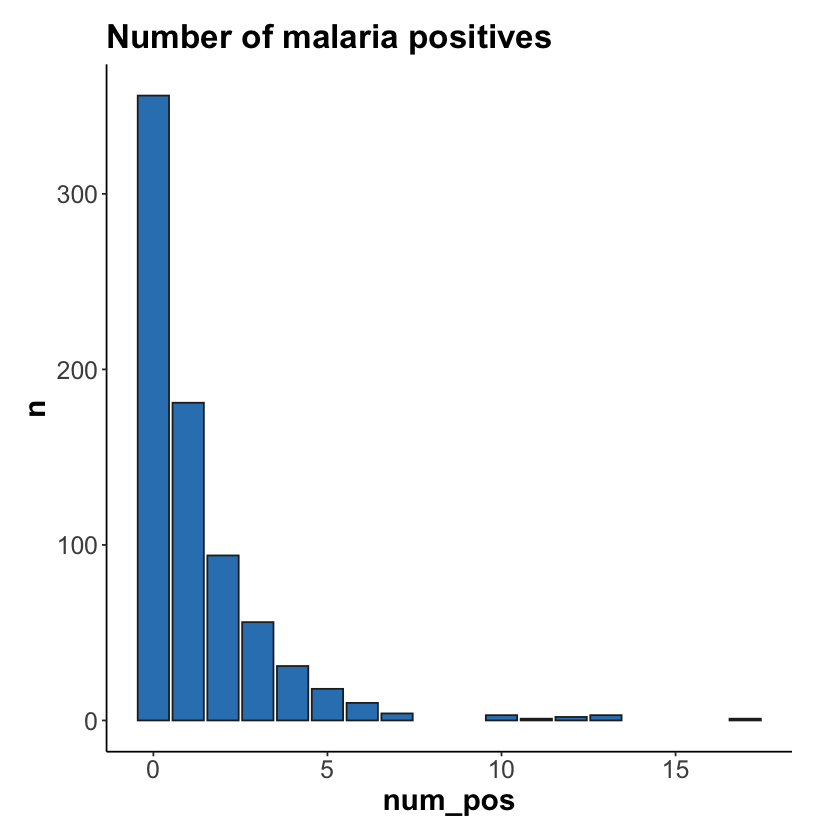

In [71]:
df_num_pos <- df_cohort_2 %>% count(num_pos)

ggplot(data = df_num_pos, aes(x = num_pos, y = n))+
   geom_bar(stat = "identity", fill = "#3182bd", color = "#252525")+
   ggtitle("Number of malaria positives")+
   theme

# All errors 

## Missing Records
•	14 records are missing in Cluster 7, Visit 8
•	11 records are missing in Cluster 5, Visit 10
## Incorrect Availability Data
•	“Avail” is mistakenly recorded as 0 for 15 children in Cluster 2, Visit 10
## Missing RDT Records
•	5 children in Cluster 1, Visit 1
•	3 children in Cluster 16, Visit 5
## Incorrect Names
•	Typos are found in approximately 1% of all records
•	In Cluster 15, Visit 11, participant 15_3-38 appears to have a duplicate or incorrect record
## Flipped Outcomes
•	All 9 positive results were incorrectly flipped to 0 in Cluster 4, Visit 8
•	All 30 negative results were incorrectly flipped to 1 in Cluster 19, Visit 12